In [1]:
#@title Importing Packages

# Utility
import math as math
import numpy as np
import pandas as pd
import random as rdm
import scipy.io as io
import scipy.stats as stats
from google.colab import drive
import networkx as nx
import time
from statsmodels.tsa.stattools import acf

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.animation import FuncAnimation
from functools import partial
import matplotlib.patches as patch

# Plotting functions

In [2]:
#@title Function to plot results

def plotResults(results, sites, length, name, y):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(name, fontsize = 20)
    fig.text(0.5, 0.08, "Time", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.08, 0.5, y, ha = 'center', va = 'center', rotation = 90, fontsize = 15)

    cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, sites))

    plt.xlim(0, length)
    siteArray = []

    for i in range(sites):
        site, = plt.plot(range(length), results[i, :], color = cmap[i], label = f"{i + 1}")
        siteArray.append(site)
    
    legend = fig.legend(handles = siteArray, loc = 'upper center', borderpad = 0.2, facecolor = 'k', edgecolor = 'w', ncol = sites)
    for text in legend.get_texts():
        plt.setp(text, color = 'w')

    plt.show()

## Prior PDF/PMF

In [3]:
#@title Function to plot pdf of distribution for single parameter

def plotPDF(dist, mean, true, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"PDF of {name} prior", fontsize = 20)
    fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "Density", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

    sample = dist.rvs(10000)
    plt.hist(sample, bins = 100, alpha = 0.5, color = 'lightblue')

    points = []

    plt.scatter(true, 10, marker = '+', alpha = 0.8, s = 10, facecolor = 'g')
    plt.scatter(mean, 10, marker = 'D', alpha = 0.8, s = 10, facecolor = 'r')

    patch1 = plt.scatter(0, 0, facecolor = 'g', marker = 'D')
    patch2 = plt.scatter(0, 0, facecolor = 'r', marker = '+')
    patches = [patch1, patch2]
    patch1.remove()
    patch2.remove()

      
    legend = fig.legend(handles = patches,
                        labels = ['True Value', 'Predicted Value'],
                        bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')
    
    for text in legend.get_texts():
        plt.setp(text, color = 'w')

    plt.show()


In [4]:
#@title Function to plot pdf of distribution for set of parameters

def plotPDFSet(dist, mean, true, N, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"PDF of {name} prior", fontsize = 20)
    fig.text(0.5, 0.05, "Density", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "Value", ha = 'center', va = 'center', rotation = 90, fontsize = 15)
    cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, max(len(true), N)))

    sample = dist.rvs(10000)
    plt.hist(sample, alpha = 0.5, bins = 100, color = 'lightblue')

    points = []

    for i in range(N):
        plt.scatter(mean[i], 10, alpha = 0.8, color = cmap[i], s = 10, marker = '+')
    for i in range(N):
        plt.scatter(true[i], 10, alpha = 0.8, color = cmap[i], s = 10, marker = 'D')
    for i in range(N):
        point = plt.scatter(0, 0, edgecolor = 'k', facecolor = cmap[i], label = f"{i + 1}")
        points.append(point)
        point.remove()


    patch1 = plt.scatter(0, 0, color = 'w', marker = 'D')
    patch2 = plt.scatter(0, 0, color= 'w', marker = '+')
    patches = [patch1, patch2]
    patch1.remove()
    patch2.remove()

      
    legend1 = fig.legend(handles = patches,
                        labels = ['True Value', 'Predicted Value'],
                        bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')

    legend2 = fig.legend(handles = points, loc = 'upper center', ncol = N, borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')
    
    for text in legend1.get_texts():
        plt.setp(text, color = 'w')

    for text in legend2.get_texts():
        plt.setp(text, color = 'w')

    plt.show()


In [5]:
#@title Function to plot pmf of distribution for set of parameters

def plotPMFSet(dist, mean, true, N, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"PMF of {name} prior", fontsize = 20)
    fig.text(0.5, 0.05, "Density", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "Value", ha = 'center', va = 'center', rotation = 90, fontsize = 15)
    cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, max(len(true), N)))

    sample = dist.rvs(10000)
    plt.hist(sample, alpha = 0.5, color = 'tab:blue')

    points = []

    for i in range(N):
        plt.scatter(mean[i], 10, alpha = 0.8, color = cmap[i], s = 10, marker = '+')
    for i in range(N):
        plt.scatter(true[i], 10, alpha = 0.8, color = cmap[i], s = 10, marker = 'D')
    for i in range(N):
        point = plt.scatter(0, 0, edgecolor = 'k', facecolor = cmap[i], label = f"{i + 1}")
        points.append(point)
        point.remove()


    patch1 = plt.scatter(0, 0, color = 'w', marker = 'D')
    patch2 = plt.scatter(0, 0, color = 'w', marker = '+')
    patches = [patch1, patch2]
    patch1.remove()
    patch2.remove()

      
    legend1 = fig.legend(handles = patches,
                        labels = ['True Value', 'Predicted Value'],
                        bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')
    
    for text in legend1.get_texts():
        plt.setp(text, color = 'w')

    legend2 = fig.legend(handles = points, loc = 'upper center', ncol = N, borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')
    
    for text in legend2.get_texts():
        plt.setp(text, color = 'w')

    plt.show()


## Walk of value

In [6]:
#@title function to plot walk of single parameter

def plotWalk(sample, true, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"Walk of {name}", fontsize = 20)
    fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "Value", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

    plt.xlim(0, len(sample))
    plt.plot(range(len(sample)), sample, label = "Predicted Value", c = 'lightblue')
    plt.plot([0, len(sample)], [true, true], '--', label = 'True value', c = 'tab:orange')

    
    legend = fig.legend(handles = [plt.Line2D([0,1], [0,1], linestyle = '--', color = 'tab:orange'), 
                        plt.Line2D([0,1], [0,1], color = 'lightblue')], 
                        labels = ['True Value', 'Predicted Value'],
                        bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')
    
    for text in legend.get_texts():
        plt.setp(text, color = 'w')

    plt.show()

In [7]:
#@title function to plot walk of set of parameters

def plotWalkSet(sample, true, N, name):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Walk of {name}", fontsize = 20)

  plt.xlim(0, len(sample[:, 0]))
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Value", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, max(len(true), N)))
  trueLines = []

  for i in range(N):
    predLine, = plt.plot(range(len(sample[:, i])), sample[:, i], color = cmap[i], alpha = 0.5)

  for i in range(len(true)):  
    plt.plot([0, len(sample[:, 0])], [true[i], true[i]], '--', color = cmap[i])

    
  for i in range(max(len(true), N)):  
    trueLine, = plt.plot([0, 1], [0, 1], '--', color = cmap[i])
    trueLines.append(trueLine)
    trueLine.remove()

  legend1 = fig.legend(handles = trueLines, labels = range(1, max(len(true), N) + 1), loc = 'upper center', ncol = max(N, len(true)), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend1.get_texts():
        plt.setp(text, color = 'w')

  legend2 = fig.legend(handles = [plt.Line2D([0,1], [0,1], linestyle = '--', color = 'w'), 
                      plt.Line2D([0,1], [0,1], color = 'w')], 
                      labels = ['True Value', 'Predicted Value'],
                      bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend2.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show()

## Walk of likelihood

In [8]:
#@title function to plot likelihood walk

def plotLikelihood(likelihood, sites, length, name):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Walk of Likelihood of {name}", fontsize = 20)
  
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Likelihood", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  likelihoodLine, = plt.plot(range(len(likelihood[:])), np.e**(likelihood[:]/(sites*length)), '--', c = 'lightblue')
  
  plt.show()

In [9]:
#@title function to plot likelihood walk for set

def plotLikelihoodSet(likelihood, sites, length, N, name, labels):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Walk of Likelihood of {name}", fontsize = 20)
  
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Likelihood", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, N))
  trueLines = []

  for i in range(N):
    likelihoodLine, = plt.plot(range(len(likelihood[:,i])), np.e**(likelihood[:,i]/(sites*length)), '--', color = cmap[i], alpha = 0.8)
    trueLines.append(likelihoodLine)


  legend1 = fig.legend(handles = trueLines, labels = labels, loc = 'upper center', ncol = N, borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend1.get_texts():
        plt.setp(text, color = 'w')

  plt.show()

## Walk of DIC

In [10]:
#@title Function to plot walk of DIC

def plotDIC(dic, sites, length, name):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Walk of DIC of {name}", fontsize = 20)
  
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "DIC", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  dicLine, = plt.plot(range(len(dic[:])), dic[:], '--', c = 'lightblue')
  
  return ax

In [11]:
#@title Function to plot walk of DIC for set

def plotDICSet(dic, sites, length, N, labels, name):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Walk of DIC of {name}", fontsize = 20)
  
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "DIC", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, N))
  trueLines = []

  for i in range(N):
      dicLine, = plt.plot(range(len(dic[:, i])), dic[:, i], '--', color = cmap[i], alpha = 0.5)
      trueLines.append(dicLine)

  legend1 = fig.legend(handles = trueLines, labels = labels, loc = 'upper center', ncol = N, borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend1.get_texts():
        plt.setp(text, color = 'w')
  
  return ax

## Walk of ESS

In [12]:
#@title Function to plot walk of ESS for single parameter

def plotESS(sample, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"Effective Sample Size of {name}", fontsize = 20)
    fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "ESS", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

    plt.xlim(0, len(sample))
    plt.plot(range(len(sample)), sample, label = "Predicted Value", c = 'lightblue')

    plt.show()

In [13]:
#@title Function to plot walk of ESS for set of parameters

def plotESSSet(sample, N, name):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Effective Sample Size of {name}", fontsize = 20)

  plt.xlim(0, len(sample[:, 0]))
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "ESS", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, N))
  predLines = []

  for i in range(N):
    predLine, = plt.plot(range(len(sample[:, i])), sample[:, i], color = cmap[i], alpha = 0.5)
    predLines.append(predLine)
    
  legend1 = fig.legend(handles = predLines, labels = range(1, N + 1), loc = 'upper center', ncol = N, borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend1.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show()

## Histogram

In [14]:
#@title Function to plot histogram for single parameter

def plotHist(sample, true, name):

  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Histogram of {name}", fontsize = 20)
  fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Frequency", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  plt.hist(sample, color = 'lightblue', alpha = 0.5, bins = 100)
  patch1 = plt.scatter(np.median(sample), 10, alpha = 0.8, s = 10, marker = '+', c = 'g', label = 'True value')
  patch2 = plt.scatter(true, 10, alpha = 0.8, s = 10, marker = 'D', c = 'r', label = 'Predicted Value')
  patches = [patch1, patch2]

    
  legend = fig.legend(handles = patches,
                      labels = ['True Value', 'Predicted Value'],
                      bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show()

In [15]:
#@title Function to plot histogram for set of parameters

def plotHistSet(sample, true, N, name):

  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Histogram of {name}", fontsize = 20)
  fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Frequency", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, max(len(true), N)))

  hists = []
  rectBoxes = []

  for i in range(N):
      hist = plt.hist(sample[:, i], bins = 100, color = cmap[i], alpha = 0.5)
      hists.append(hist[2].__getitem__(1).get_facecolor())

  for i in range(N):
      plt.scatter(np.median(sample[:, i]), 10, alpha = 0.8, s = 10, color = cmap[i], marker = '+')

  for i in range(max(len(true), N)):
      rect = patch.Patch(label = f"{i + 1}", facecolor = cmap[i], edgecolor = 'w')
      rectBoxes.append(rect)

  for i in range(len(true)):
      plt.scatter(true[i], 10, alpha = 0.8, s = 10, color = cmap[i], marker = 'D')

  patch1 = plt.scatter(0, 0, color = 'w', marker = 'D')
  patch2 = plt.scatter(0, 0, color='w', marker = '+')
  patches = [patch1, patch2]
  patch1.remove()
  patch2.remove()

  legend1 = fig.legend(handles = rectBoxes, loc = 'upper center', ncol = max(len(true), N), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')

  for text in legend1.get_texts():
        plt.setp(text, color = 'w')

  legend2 = fig.legend(handles = patches,
                      labels = ['True Value', 'Predicted Value'],
                      bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend2.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show() 

In [16]:
#@title Function to plot barplot for set of parameters

def plotHistSetDiscrete(sample, true, N, name):

  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Barplot of {name}", fontsize = 20)
  fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Frequency", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, max(len(true), N)))

  hists = []
  rectBoxes = []

  for i in range(N):
      barplotDF = pd.DataFrame(columns = ['Count'], index = np.unique(sample[:, i]))
      for j in barplotDF.index:
          barplotDF.loc[j]['Count'] = sum([1 for x in sample[:, i] if x == j])

      hist = plt.bar(barplotDF.index, barplotDF['Count'], color = cmap[i], alpha = 0.5)
      hists.append(hist[0].get_facecolor())

  for i in range(N):
      plt.scatter(np.median(sample[:, i]), 10, alpha = 0.8, s = 10, color = cmap[i], marker = '+')

  for i in range(max(len(true), N)):
      rect = patch.Patch(label = f"{i + 1}", facecolor = cmap[i], edgecolor = 'w')
      rectBoxes.append(rect)

  for i in range(len(true)):
      plt.scatter(true[i], 10, alpha = 0.8, s = 10, color = cmap[i], marker = 'D')



  patch1 = plt.scatter(0, 0, color = 'w', marker = 'D')
  patch2 = plt.scatter(0, 0, color='w', marker = '+')
  patches = [patch1, patch2]
  patch1.remove()
  patch2.remove()

  legend1 = fig.legend(handles = rectBoxes, loc = 'upper center', ncol = max(len(true), N), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')

  for text in legend1.get_texts():
        plt.setp(text, color = 'w')

  legend2 = fig.legend(handles = patches,
                      labels = ['True Value', 'Predicted Value'],
                      bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend2.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show() 

## Scatterplot of likelihood

In [17]:
#@title Function to plot scatterplot of likelihood for single parameter
def plotScatterLikelihood(sample, likelihood, sites, length, true, name):

  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Scatterplot of Likelihood of {name}", fontsize = 20)
  fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Likelihood", ha = 'center', va = 'center', rotation = 90, fontsize = 15)


  plt.scatter(sample, np.e**(likelihood/(sites*length)), alpha = 0.1, c = 'lightblue')

  point0 = plt.scatter(0, 0, c = 'lightblue')
  point1 = plt.scatter(true, 0, marker = 'D', s = 10, facecolor = 'r')
  point2 = plt.scatter(np.median(sample), 0, s = 10, marker = '+', facecolor = 'g')
  points = [point0, point1, point2]
  point0.remove()

  legend = fig.legend(handles = points,
                    labels = ['Likelihood values', 'True Value', 'Predicted Value'],
                    bbox_to_anchor = (0.875, 0.1), borderpad = 0.2, 
                    facecolor = 'k', edgecolor = 'w', ncol = 2)

  for text in legend.get_texts():
        plt.setp(text, color = 'w')

In [18]:
#@title Function to plot scatterplot of likelihood for set of parameters
def plotScatterLikelihoodSet(sample, likelihood, sites, length, true, N, name):

  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Scatterplot of Likelihood of {name}", fontsize = 20)
  fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Likelihood", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, max(len(true), N)))
  values = []

  for i in range(N):
      plt.scatter(sample, np.e**(likelihood/(sites*length)), color = cmap[i], alpha = 0.05)
  for i in range(N):
      plt.scatter(np.median(sample[:, i]), 0, s = 10, marker = '+', facecolor = cmap[i], edgecolor = 'k')
  for i in range(N):
      plt.scatter(0, 0, edgecolor = 'k', facecolor = cmap[i], label = f"{i + 1}")

  for i in range(max(len(true), N)):
      point = plt.scatter(0, 0, edgecolor = 'k', facecolor = cmap[i], label = f"{i + 1}")
      values.append(point)
      point.remove()

  for i in range(len(true)):
      plt.scatter(true[i], 0, marker = 'D', s = 10, facecolor = cmap[i], edgecolor = 'k')

  point0 = plt.scatter(0, 0, edgecolor = 'w', c = 'w')
  point1 = plt.scatter(0, 0, marker = 'D', edgecolor = 'w', facecolor = 'w')
  point2 = plt.scatter(0, 0, marker = '+', edgecolor = 'w', facecolor = 'w')
  points = [point0, point1, point2]
  point0.remove()
  point1.remove()
  point2.remove()

  legend1 = fig.legend(handles = values, loc = 'upper center', ncol = max(len(true), N), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend1.get_texts():
        plt.setp(text, color = 'w')

  legend2 = fig.legend(handles = points,
                    labels = ['Likelihood values', 'True Value', 'Predicted Value'],
                    bbox_to_anchor = (0.875, 0.1), borderpad = 0.2, 
                    facecolor = 'k', edgecolor = 'w', ncol = 2)
  
  for text in legend2.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show()

## Walk of Accept ratio

In [19]:
#@title Function to plot Walk of Accept Ratio for single parameter

def plotAcceptRatio(sample, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"Walk of Accept Ratio for {name}", fontsize = 20)
    fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "Ratio", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

    plt.xlim(0, len(sample))
    plt.ylim(0, 1)
    plt.plot(range(len(sample)), sample, label = "Predicted Value", c = 'lightblue')

    plt.show()

In [20]:
#@title Function to plot Walk of Accept Ratio for set of parameters


def plotAcceptRatioSet(sample, N, name):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Walk of Accept Ratio for {name}", fontsize = 20)
  plt.xlim(0, len(sample[:, 0]))
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Value", ha = 'center', va = 'center', rotation = 90, fontsize = 15)
  cmap = mpl.colormaps['rainbow'](np.linspace(0, 1, N))
  
  plt.xlim(0, len(sample))
  plt.ylim(0, 1)
  predLines = []

  for i in range(N):
    predLine, = plt.plot(range(len(sample[:, i])), sample[:, i], alpha = 0.5, color = cmap[i], label = f"{i + 1}")
    predLines.append(predLine)

  legend = fig.legend(handles = predLines, loc = 'upper center', ncol = N, borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show()

## Whole results function

In [21]:
def results(N, string):

    print(string)
    print("Acceptance probabilities")
    for (accept, name) in [(alphaAccept, 'alpha'), (betaAccept, 'beta'), (IAccept, 'I'), (TAccept, 'T'), (WAccept, 'W'), (SAccept, 'S'), (tauAccept, 'Tau')]:
        print(f"{name} Acceptance rate: {format(accept/S, '.4f')}")
    print("")
    print("")
    print("Summary statistics")
    for (true, array, name) in [(trueAlpha, alphaArray, 'Alpha'), (trueBeta, betaArray, 'Beta'), (trueTau, tauArray, 'Tau')]:
        print(f"{name}: {true}, {np.median(array)}")
        print(stats.t.interval(alpha = 0.95, df = len(array) - 1,
                      loc = np.mean(array),
                      scale = stats.sem(array)))
        print("")

    for (true, array, name) in [(trueI, IArray, 'I'), (trueT, TArray, 'T'), (trueW, WArray, 'W'), (trueS, SArray, 'S')]:
        for i in range(N):
          if i < trueN:
            print(f"{name}{i}: {true[i]}, {np.median(array[:, i])}")
            print(stats.t.interval(alpha = 0.95, df = len(array[:, i]) - 1,
                          loc = np.mean(array[:, i]),
                          scale = stats.sem(array[:, i])))
          else:
            print(f"{name}{i}, {np.median(array[:, i])}")
            print(stats.t.interval(alpha = 0.95, df = len(array[:, i]) - 1,
                        loc = np.mean(array[:, i]),
                        scale = stats.sem(array[:, i])))
        if N < trueN:
          for i in range(N, trueN):
            print(f"{name}{i}: {true[i]}")
            

        print("")

    print("")
    print("Plotting results")

    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, sites)))
    for i in range(sites):
      plt.plot([0, 0], [i, i])

    massSample = getSample(sites, length, pmat, np.median(alphaArray), np.median(betaArray), N, 
                       [int(np.median(IArray[:, i])) for i in range(N)], [int(np.median(TArray[:, i])) for i in range(N)], 
                       [int(np.median(WArray[:, i])) for i in range(N)], [np.median(SArray[:, i]) for i in range(N)])
    plotResults(massSample, sites, length, f"Predicted Mass Sample - {string}", "Mass")
    plotResults(massSample*OArray, sites, length, f"Predicted Mass Sample - Observed - {string}", "Mass")

    concSample = convertConcentration(sites, length, massSample, V, delta)
    ySample = convertY(concSample, 1/np.sqrt(np.median(tauArray)))

    plotResults(concSample, sites, length, f"Predicted Concentration Sample - {string}", "Concentration")
    plotResults(concSample*OArray, sites, length, f"Predicted Concentration Sample - Observed - {string}", "Concentration")

    plotResults(ySample, sites, length, f"Predicted Y Sample - {string}", "Y")
    plotResults(ySample*OArray, sites, length, f"Predicted Y Sample - Observed - {string}", "Y")

    plotResults(np.e**ySample, sites, length, f"Predicted Y Sample - Converted from Log - {string}", "e^Y")
    plotResults((np.e**ySample)*OArray, sites, length, f"Predicted Y Sample - Converted from Log - Observed - {string}", "e^Y")
    
    print("")
    print("")

    print("Parameter diagnostics")
    for (true, array, likelihood, ess, ratio, name) in [(trueAlpha, alphaArray, alphaLikelihoodArray, alphaESSArray, alphaRatioArray, 'Alpha'), 
                                                        (trueBeta, betaArray, betaLikelihoodArray, betaESSArray, betaRatioArray, 'Beta'), 
                                                        (trueTau, tauArray, tauLikelihoodArray, tauESSArray, tauRatioArray, 'Tau')]:

        print(name)
        plotWalk(array, true, f"{name} - {string}")
        plotScatterLikelihood(array[1:S], likelihood, sites, length, true, f"{name} - {string}")
        plotHist(array, true, f"{name} - {string}")
        plotESS(ess, f"{name} - {string}")
        plotAcceptRatio(np.e**(ratio/(sites*length)), f"{name} - {string}")
        print("")

    for (true, array, likelihood, ess, ratio, name) in [(trueI, IArray, ILikelihoodArray, IESSArray, IRatioArray, 'I'), 
                                                        (trueT, TArray, TLikelihoodArray, TESSArray, TRatioArray, 'T'), 
                                                        (trueW, WArray, WLikelihoodArray, WESSArray, WRatioArray, 'W')]:

        print(name)
        plotWalkSet(array, true, N, f"{name} - {string}")
        plotScatterLikelihoodSet(array[1:S, :], likelihood, sites, length, true, N, f"{name} - {string}")
        plotHistSetDiscrete(array, true, N, f"{name} - {string}")
        plotESSSet(ess, N, f"{name} - {string}")
        plotAcceptRatioSet(np.e**(ratio/(sites*length)), N, f"{name} - {string}")

    for (true, array, likelihood, ess, ratio, name) in [(trueS, SArray, SLikelihoodArray, SESSArray, SRatioArray, 'S')]:

        print(name)
        plotWalkSet(array, true, N, f"{name} - {string}")
        plotScatterLikelihoodSet(array[1:S, :], likelihood, sites, length, true, N, f"{name} - {string}")
        plotHistSet(array, true, N, f"{name} - {string}")
        plotESSSet(ess, N, f"{name} - {string}")
        plotAcceptRatioSet(np.e**(ratio/(sites*length)), N, f"{name} - {string}")

        print("")

# Toy example for algae bloom

In [22]:
#@title Importing pmat

drive.mount('drive')

pmatRaw = pd.read_csv("https://drive.google.com/uc?export=download&id=18qzQ-2TRETglAGLSXRZekyQqK7QxXUff")
pmat = pmatRaw.copy()
pmat = pmat.set_index('Unnamed: 0')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [23]:
#@title Calculates Mit based upon parameters and Mi(t - 1)

def findMNew(M, t, A, Alpha, Beta, S, pmat):

  start = S
  growth = Alpha*(A*M)
  transport = Beta*np.dot(M, pmat)

  MNew = start + growth + transport

  return MNew

In [24]:
#@title generates sample with randomly generated parameter
def runSimulation(sites, length, pmat):

    Alpha = stats.gamma(2, scale = 1).rvs()
    Beta = stats.beta(4, 3).rvs()

    # Forcing N = 1 for MH purposes
    N = 5
    # N =  stats.randint(1, int(length/10)).rvs()
    A = np.zeros((length, sites))
    S = np.zeros((length, sites))

    IArray = []
    TArray = []
    WArray = []
    SArray = []

    for n in range(N):
        i = stats.randint(0, sites - 1).rvs()
        IArray.append(i)
        T = stats.randint(1, length - 1).rvs()
        TArray.append(T)
        W = int(stats.nbinom.rvs(6, 0.75)) + 1
        WArray.append(W)

        A[range(T, (min(T + W, length))), i] = 1
        Size = stats.gamma(1, scale = 1).rvs()
        S[T, i] = Size
        SArray.append(Size)

    M = np.zeros(sites)
    MArray = np.zeros((sites, length))

    #print(f"Alpha: {Alpha}")
    #print(f"Beta: {Beta}")
    #print(f"T: {T}")
    #print(f"W: {W}")

    pDiag = [pmat.iloc[i, i] for i in range(sites)]

    for t in range(length):

        M = findMNew(M, t, A[t, :], Alpha, Beta, S[t, :], np.array(pmat.iloc[:sites, :sites]))
        MArray[:, t] = M

    return MArray, Alpha, Beta, N, IArray, TArray, WArray, SArray

In [25]:
#@title Runs simulation with given parameters

def getSample(sites, length, pmat, alpha, beta, N, I, T, W, Size):

    if (len(T) != N) or (len(W) != N) or (len(Size) != N) or (len(I) != N):
        print(N)
        print(len(T), len(W), len(Size))
        print("Error: Wrong length parameter vectors")
        return

    A = np.zeros((length, sites))
    S = np.zeros((length, sites))
    
    for n in range(N):
        A[range(T[n], (min(T[n] + W[n], length))), I[n]] = 1
        S[T[n], I[n]] = Size[n]

    M = np.zeros(sites)
    MArray = np.zeros((sites, length))
    #print(f"Alpha: {alpha}")
    #print(f"Beta: {beta}")
    #print(f"T: {T}")
    #print(f"W: {W}")

    for t in range(length):

        M = findMNew(M, t, A[t, :], alpha, beta, S[t, :], np.array(pmat.iloc[:sites, :sites]))
        MArray[:, t] = M

    return MArray

In [26]:
#@title Function to convert mass into concentration

def convertConcentration(sites, length, M, V, delta):

    C = np.zeros((sites, length))
    for i in range(sites):
        C[i, :] = M[i, :]/V[i]
    if C.any() < 0:
        print("Negative Concentration")
    LogCArray = np.log(delta + C)

    return LogCArray

In [27]:
#@title Converting Concentration to Y

def convertY(C, tau):

    LogYArray = stats.norm(C, 1/np.sqrt(tau)).rvs()
    
    return LogYArray

Parameters known:
- t = length of time
- i = number of sites
- delta = dummy parameter to ensure log(delta + Mit/Vit) works
- V = (i x 1) vector of Volumes per site
---
Parameters to be estimated:
- Alpha = growth parameter
- Beta = decay parameter
- N = Number of events
- I = (n x 1) Vector of sites per event
- S = (i x t) Vector of Size Parameters
- A = (i x t) Vector of activation time
- T = (n x 1) vector of Start time parameters
- W = (n x 1) vector of Length of time parameters
- Epsilon = Error parameter

In [28]:
def generateObservationArrayRandom(sites, length, p):

    OArray = np.ones((sites, length))
    for i in range(sites):
      u = stats.uniform(0, 1).rvs(length)
      for j in range(length):
        if p > u[j]:
          OArray[i, j] = np.NaN
    
    return OArray

In [29]:
def generateObservationArraySites(sites, length, missingSites):

    OArray = np.ones((sites, length))
    for i in missingSites:
        OArray[i, :] = np.NaN

    return OArray

In [30]:
#@title Calculating effective sample size

def ESS(arr):
    n = len(arr)
    acfArr = np.absolute(acf(arr, nlags = n, fft = True))

    return n/(1 + 2*sum(acfArr[1:]))

## MH sampler with unknown T

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
<ipython-input-26-87bfbfdaeacc>:10: RuntimeWarning: invalid value encountered in log
  LogCArray = np.log(delta + C)
<ipython-input-32-7d34757b90f8>:503: RuntimeWarning: invalid value encountered in sqrt
  pArrayCandidate = stats.norm(concSampleCurrentObserved, 1/np.sqrt(tauCandidate)).logpdf(YObserved)



Computing time was 1 hours 3 minutes and 17 seconds
All sites
Acceptance probabilities
alpha Acceptance rate: 0.3539
beta Acceptance rate: 0.0070
I Acceptance rate: 0.1011
T Acceptance rate: 0.0114
W Acceptance rate: 0.3882
S Acceptance rate: 0.4333
Tau Acceptance rate: 0.1470


Summary statistics
Alpha: 2.508623804656746, 11.399261510551543
(10.385356369468168, 10.553479110831214)

Beta: 0.5927384620724628, 0.621256792418099
(0.6469470298909505, 0.6490858994110216)

Tau: 2.298576049444426, 1.5388045058881543
(1.300003519964685, 1.3193594145370844)

I0: 7, 2.0
(2.0009203162047404, 2.0040796837952595)
I1: 2, 6.0
(5.738485248010233, 5.763914751989767)
I2: 2, 5.0
(4.998416037127214, 4.999983962872786)
I3: 5, 2.0
(2.00040387371113, 2.0039961262888704)
I4: 6, 7.0
(6.787637436331111, 6.803762563668889)

T0: 36, 6.0
(6.0492887556218, 6.163111244378201)
T1: 78, 23.0
(34.256354732027255, 35.289445267972745)
T2: 6, 89.0
(88.96111283506718, 89.00588716493283)
T3: 89, 78.0
(77.99561497753906, 78.

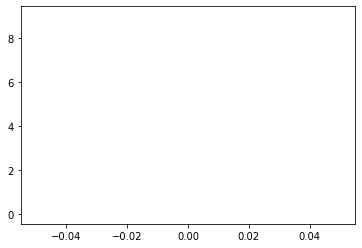

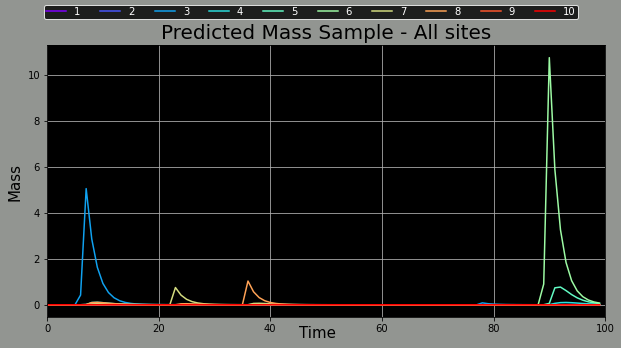

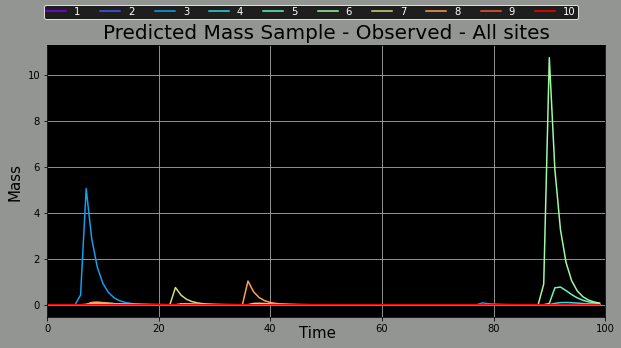

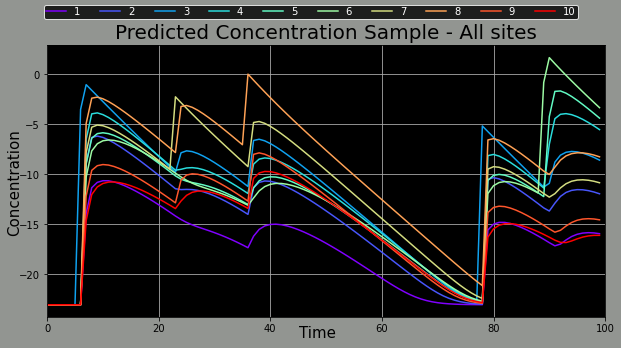

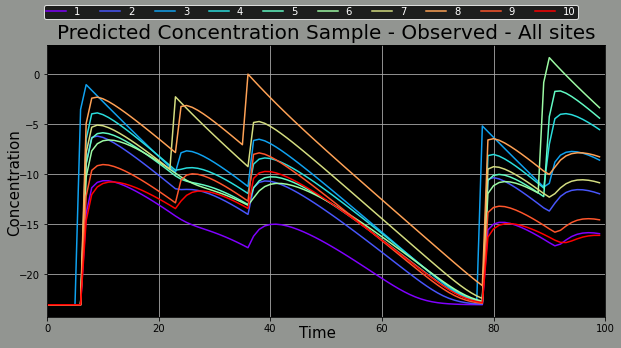

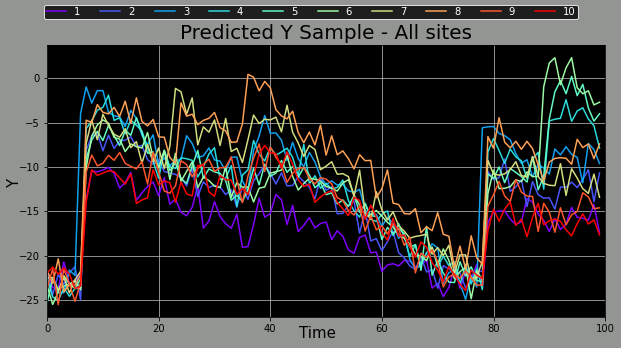

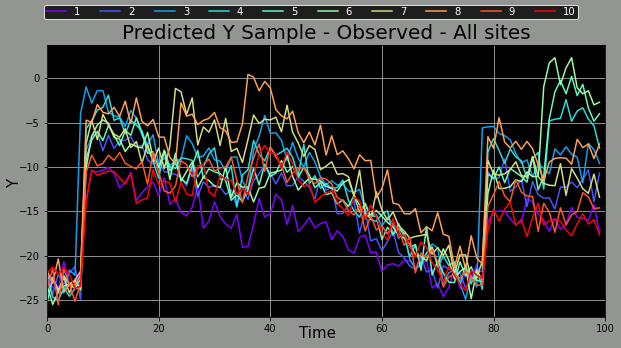

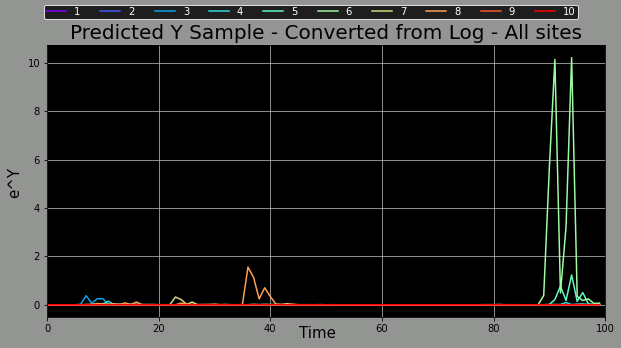

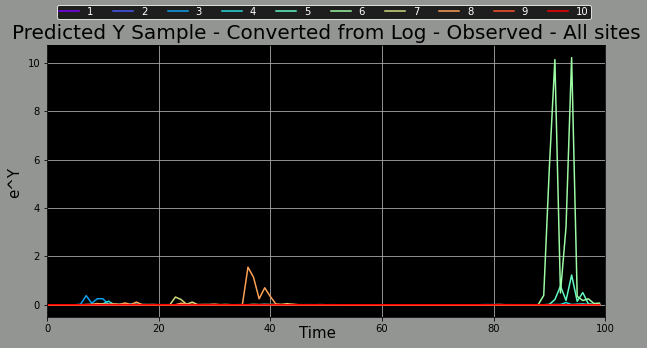



Parameter diagnostics
Alpha


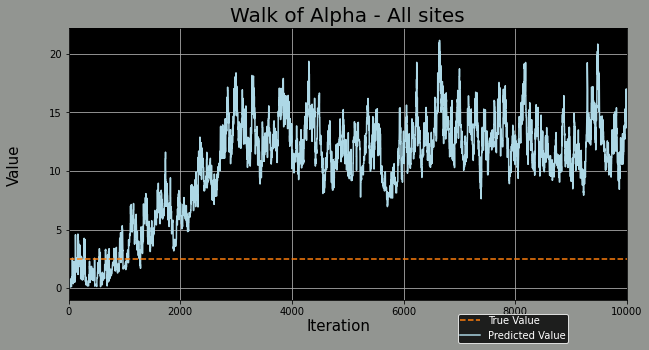

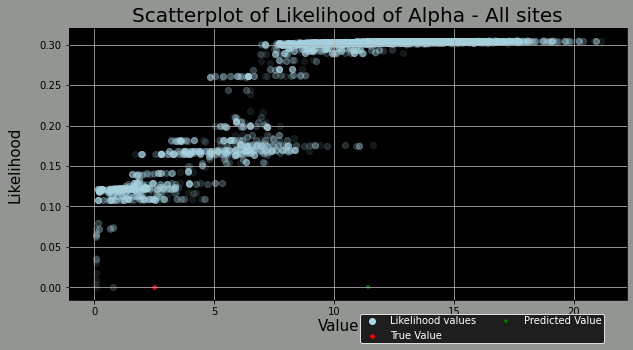

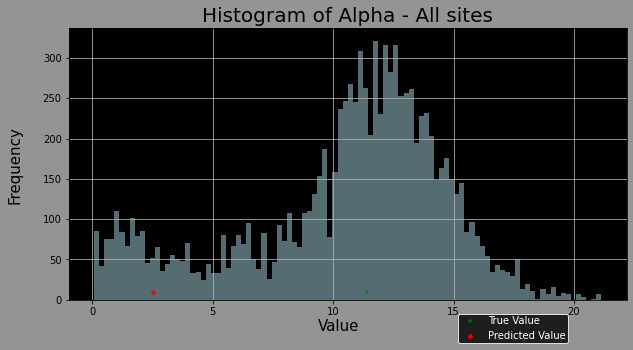

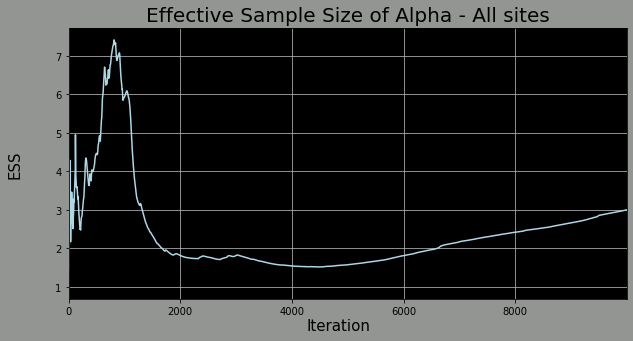

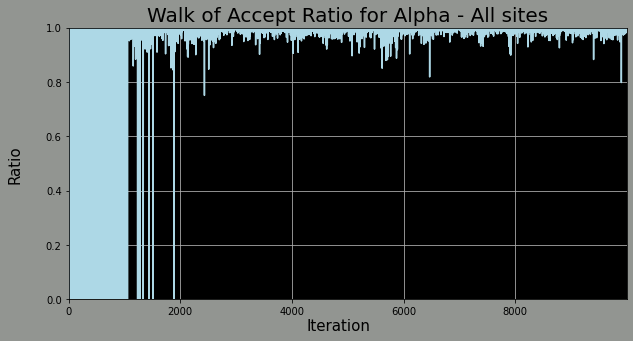


Beta


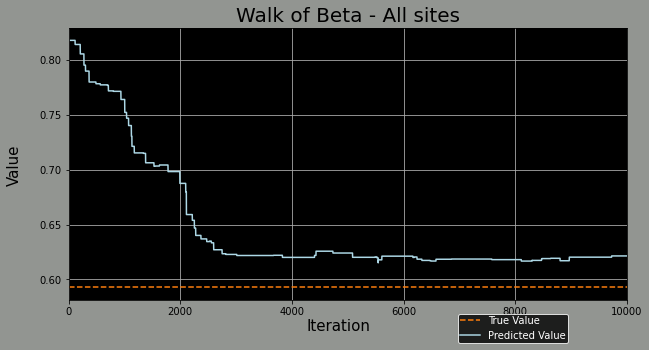

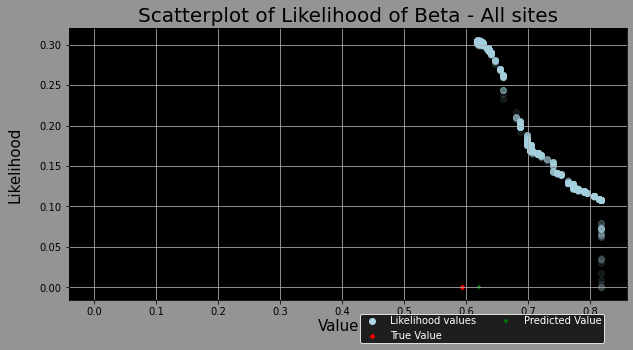

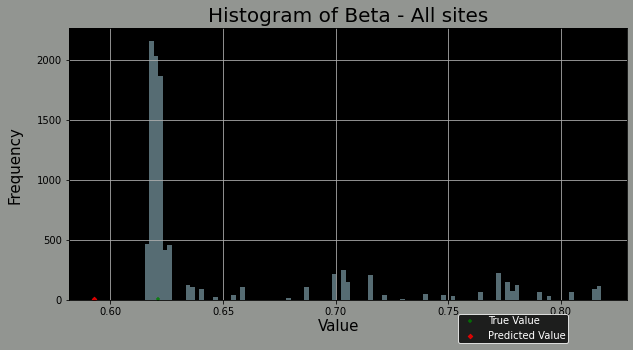

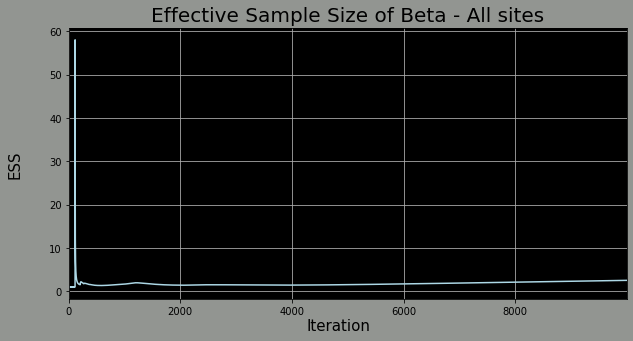

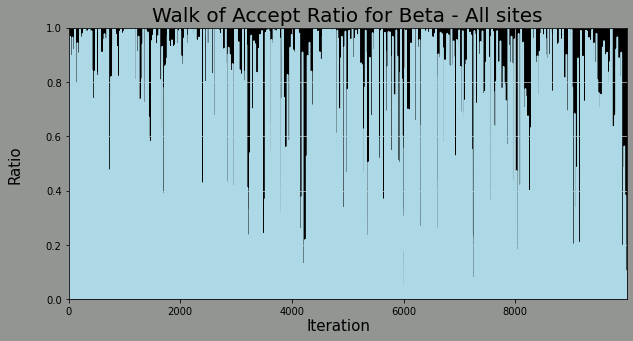


Tau


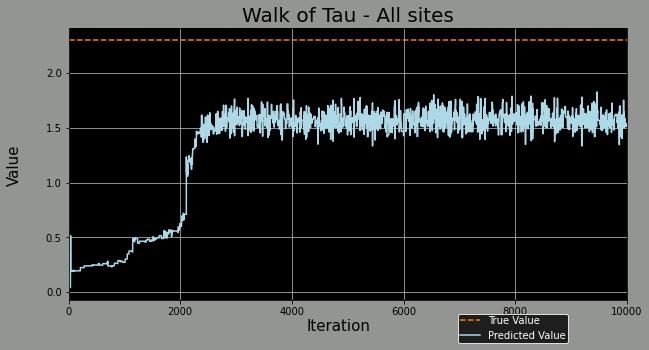

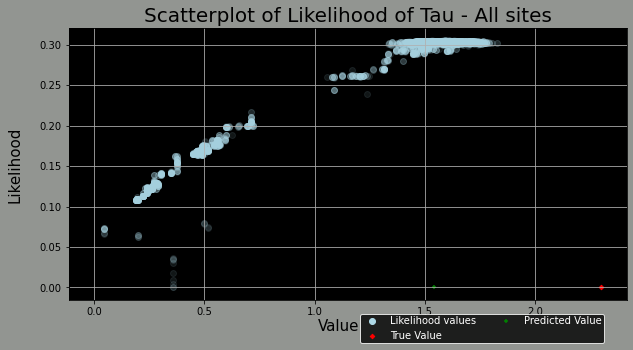

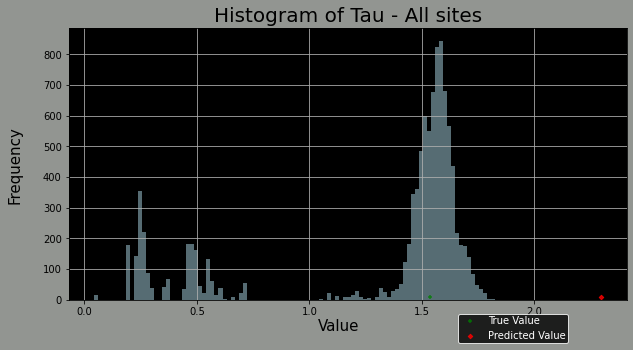

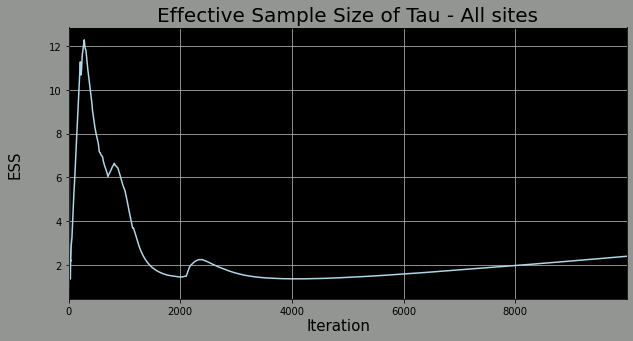

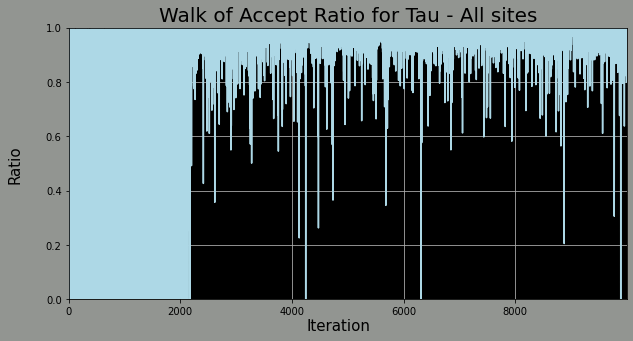


I


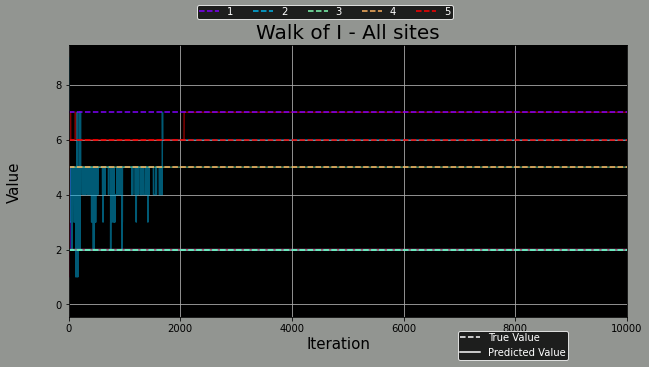

<ipython-input-18-731a88e997bf>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.median(sample[:, i]), 0, s = 10, marker = '+', facecolor = cmap[i], edgecolor = 'k')
<ipython-input-18-731a88e997bf>:32: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  point2 = plt.scatter(0, 0, marker = '+', edgecolor = 'w', facecolor = 'w')


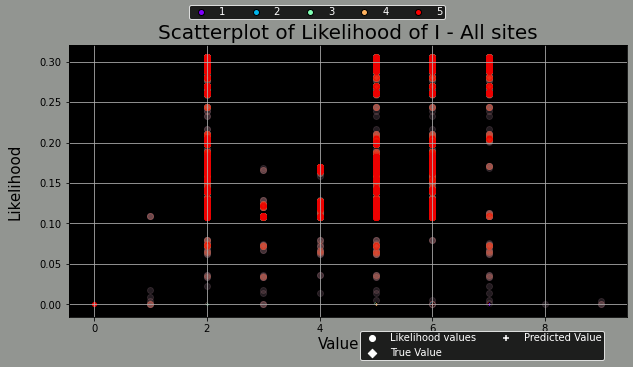

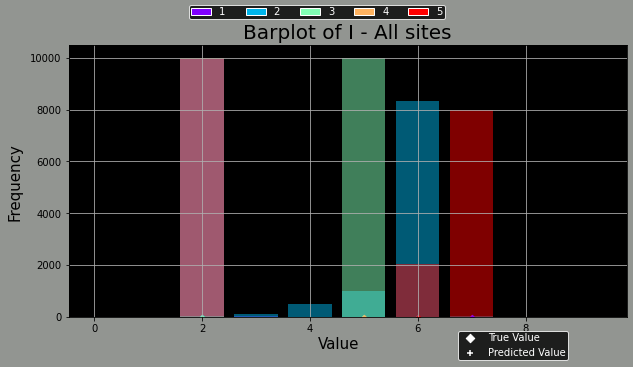

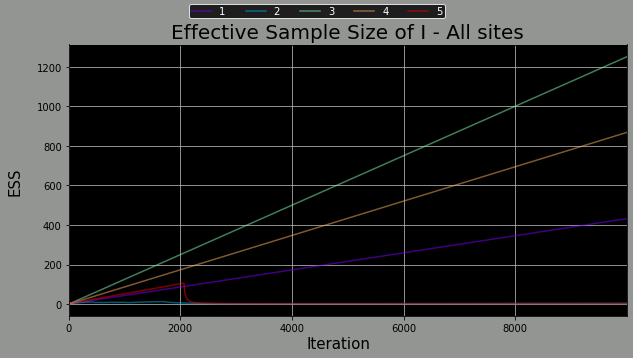

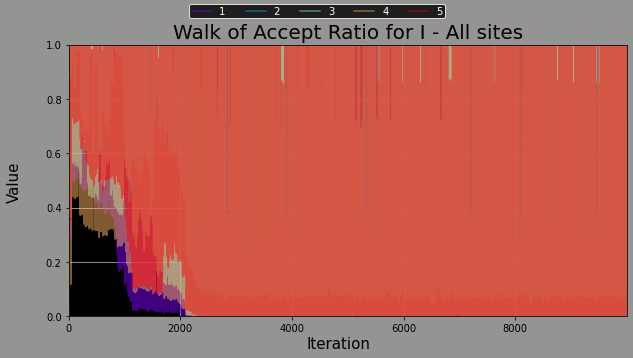

T


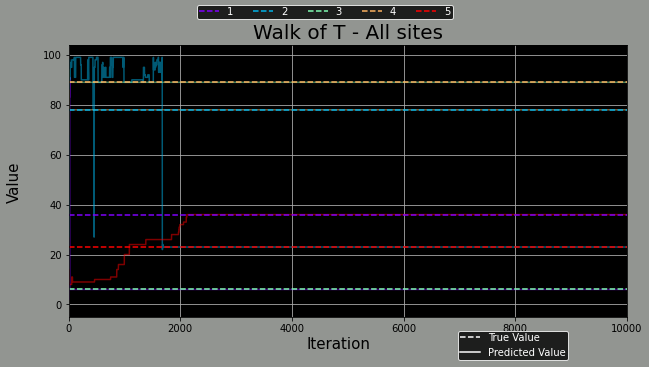

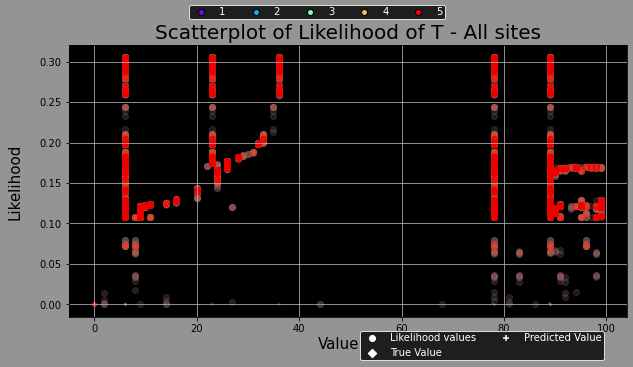

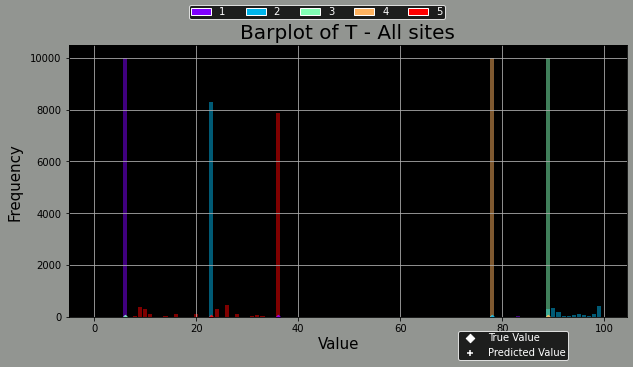

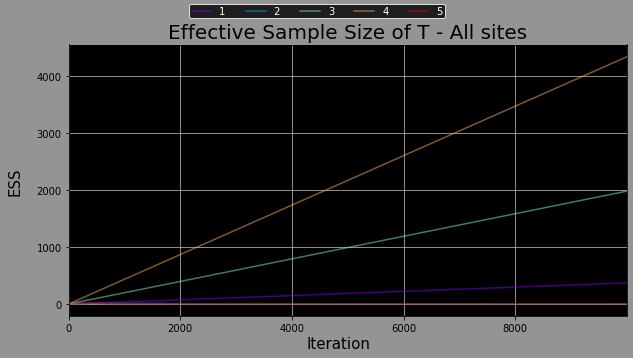

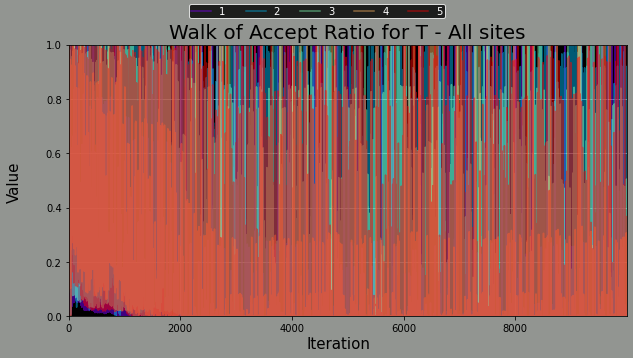

W


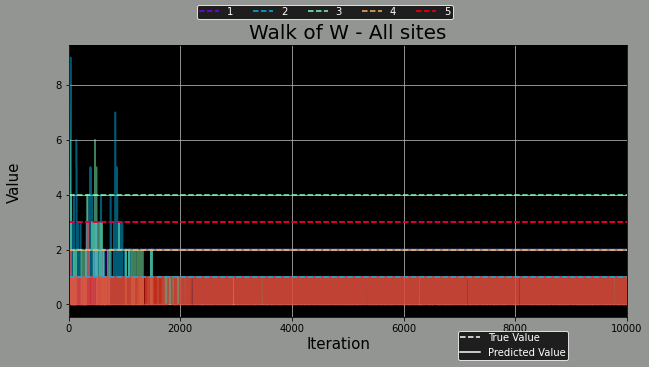

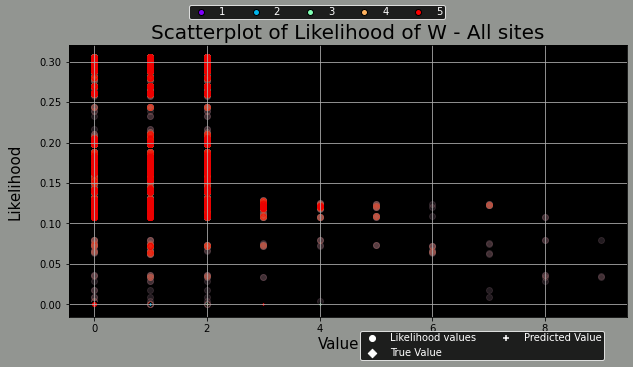

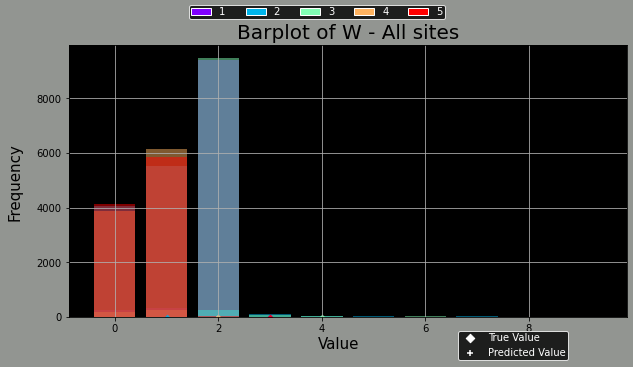

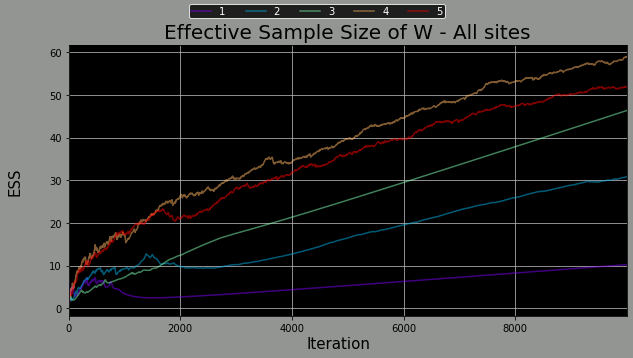

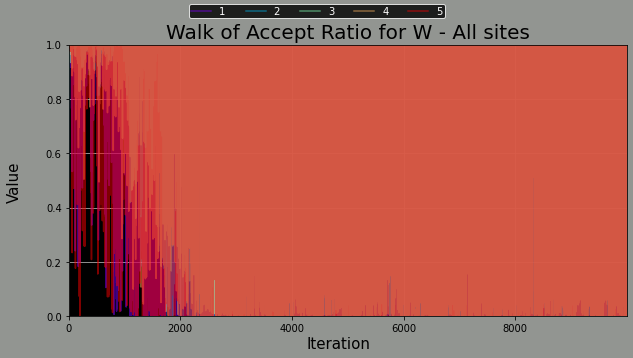

S


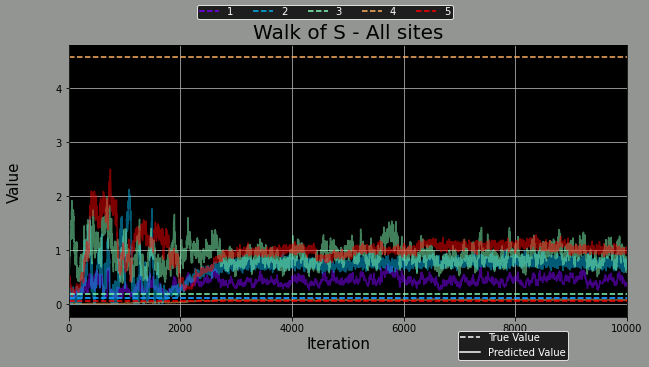

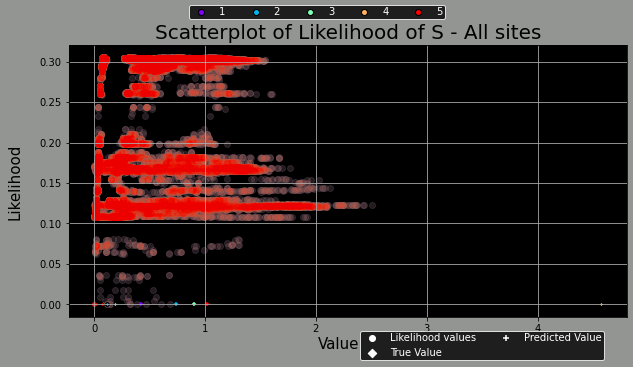

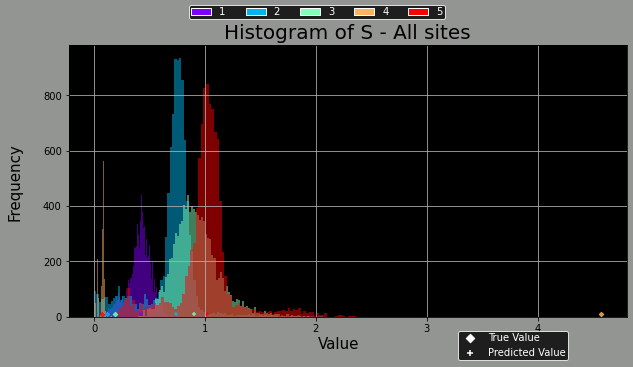

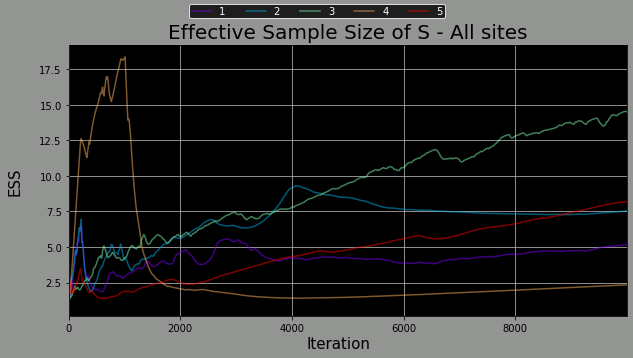

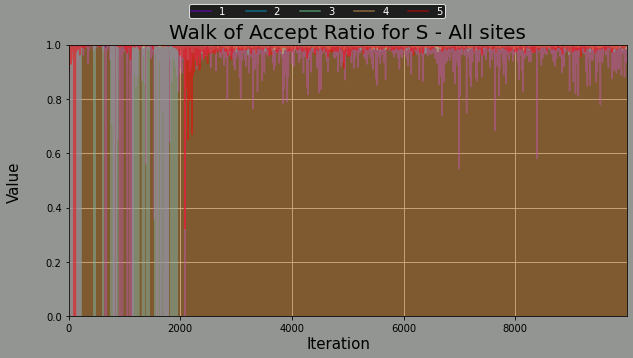



Computing time was 1 hours 3 minutes and 32 seconds
Source Sites removed
Acceptance probabilities
alpha Acceptance rate: 0.0275
beta Acceptance rate: 0.0053
I Acceptance rate: 0.1003
T Acceptance rate: 0.0103
W Acceptance rate: 0.2553
S Acceptance rate: 0.3396
Tau Acceptance rate: 0.2794


Summary statistics
Alpha: 2.508623804656746, 2.0511590497839607
(2.067751825871614, 2.0749829496798204)

Beta: 0.5927384620724628, 0.5804445536993391
(0.5773366785835711, 0.5779376300944513)

Tau: 2.298576049444426, 2.0294403269187447
(1.9959232898865569, 2.0060057125785997)

I0: 7, 6.0
(5.99996051713861, 6.0006394828613905)
I1: 2, 2.0
(2.000380408965691, 2.001619591034309)
I2: 2, 5.0
(4.99504689334668, 4.99755310665332)
I3: 5, 6.0
(5.998091198164998, 6.000308801835002)
I4: 6, 2.0
(2.022456246803681, 2.0359437531963187)

T0: 36, 36.0
(36.03594356661003, 36.047656433389974)
T1: 78, 78.0
(78.01815456893462, 78.04144543106537)
T2: 6, 89.0
(88.98656131369438, 88.99783868630561)
T3: 89, 23.0
(23.0132762

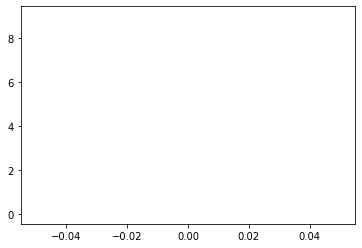

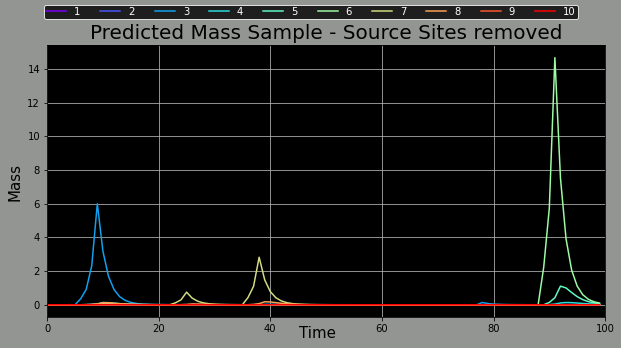

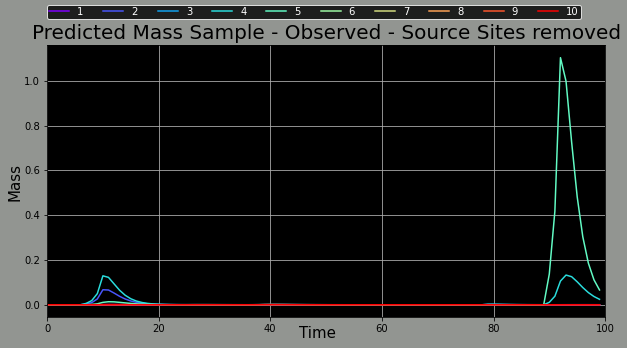

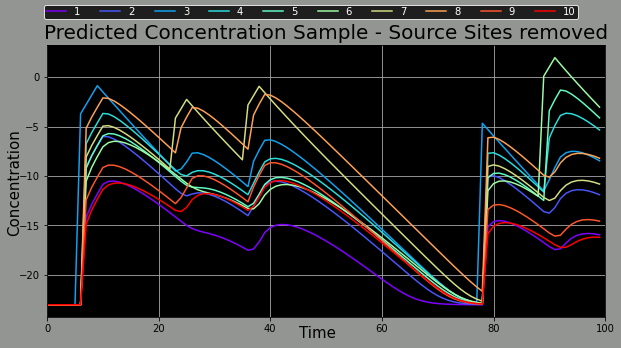

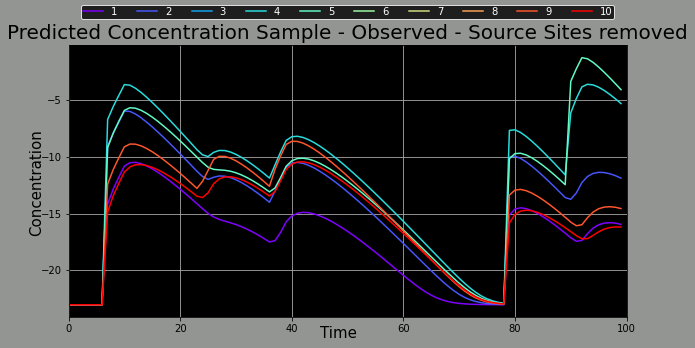

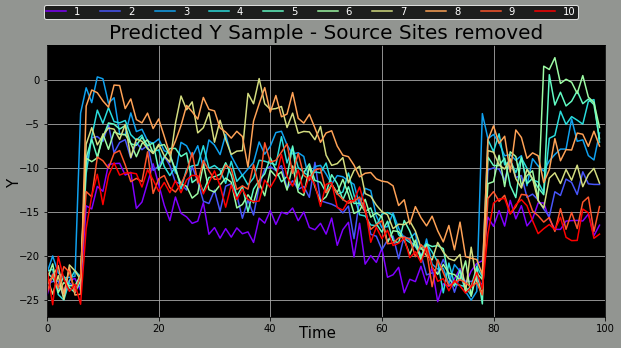

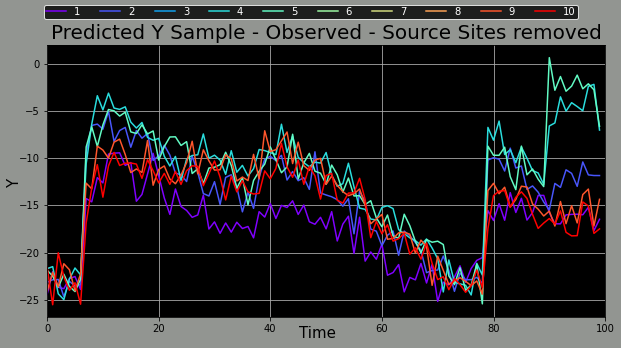

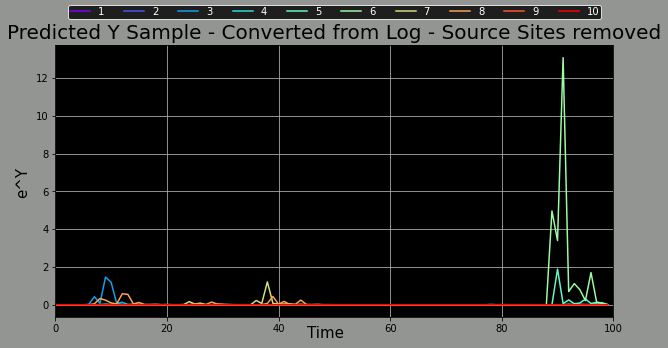

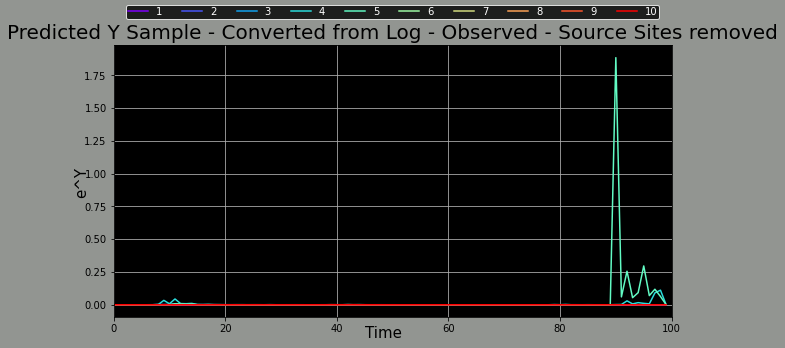



Parameter diagnostics
Alpha


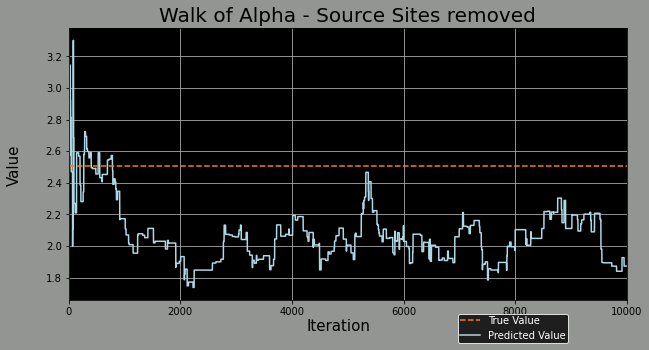

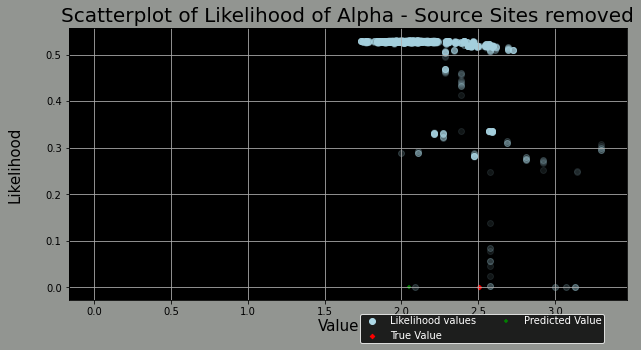

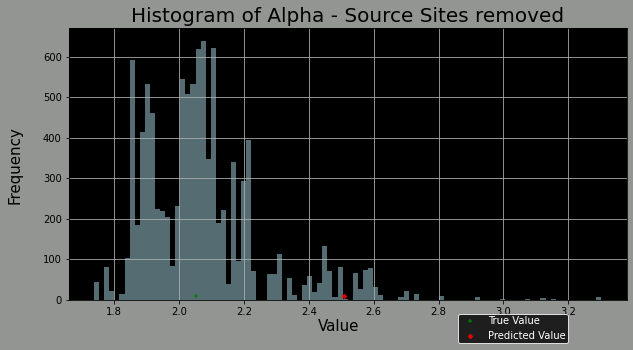

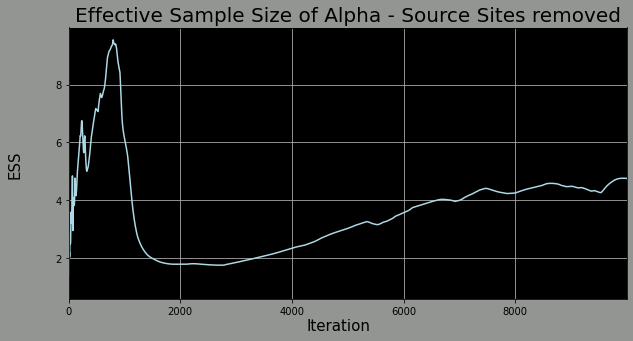

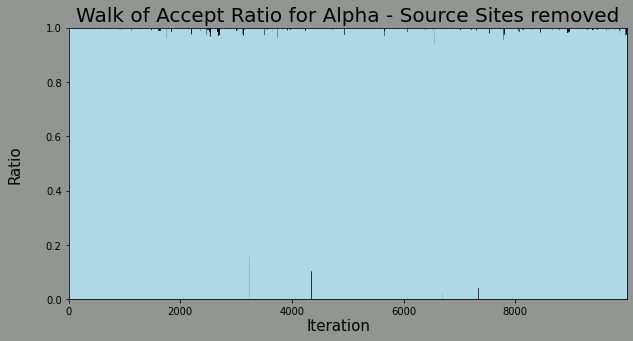


Beta


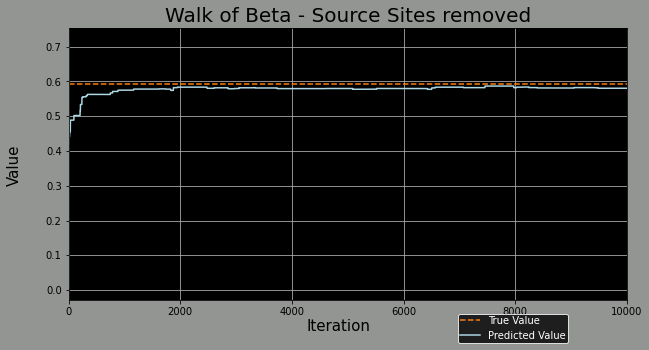

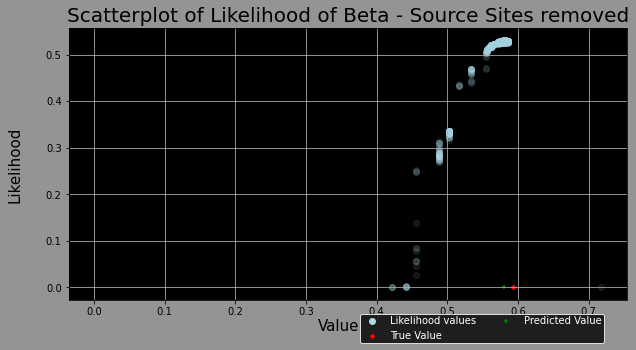

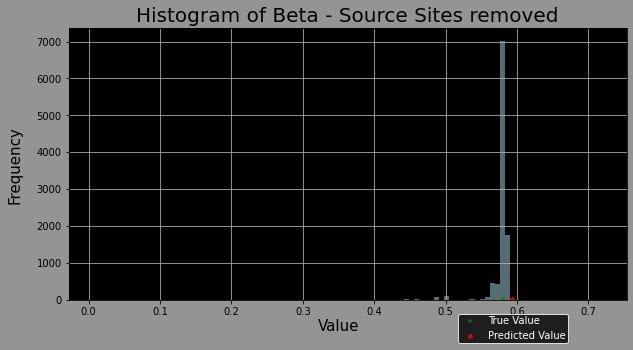

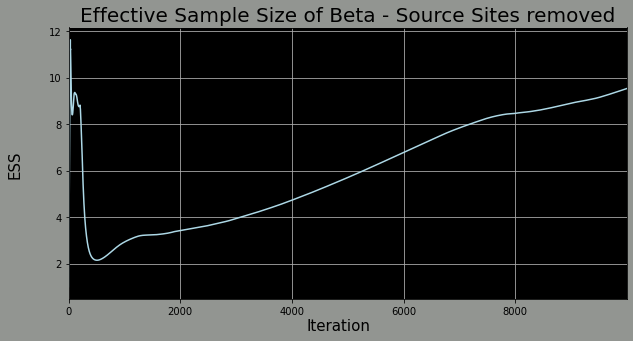

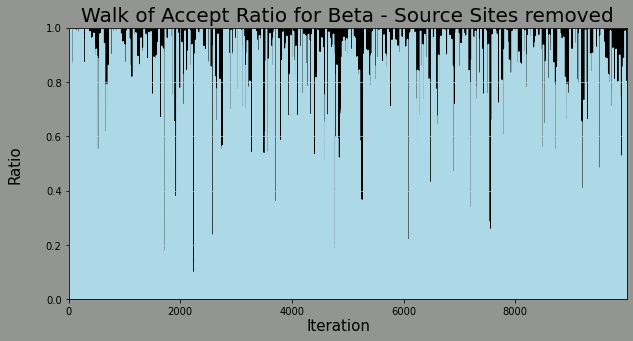


Tau


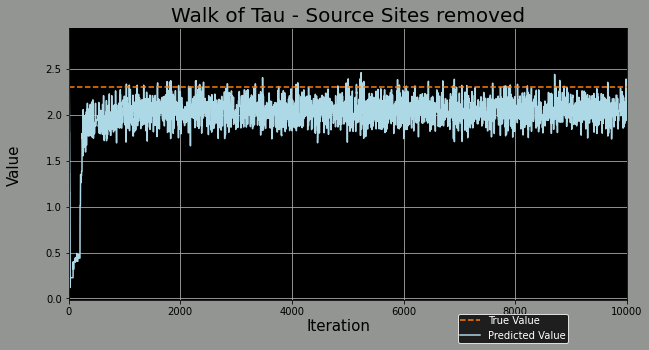

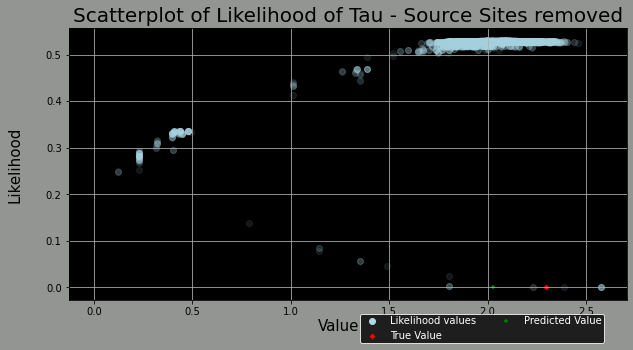

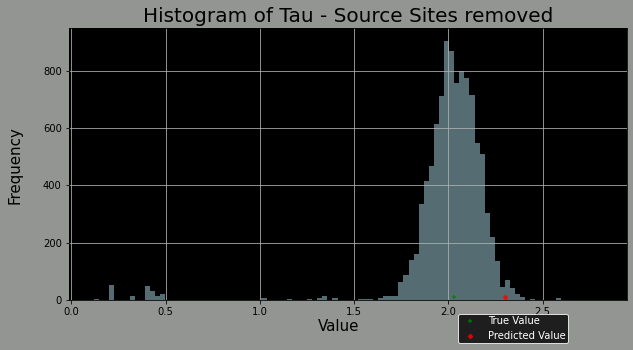

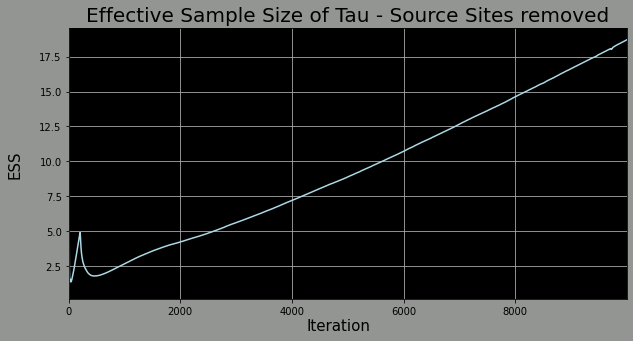

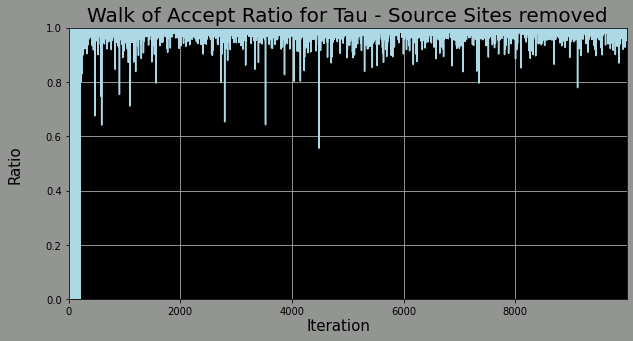


I


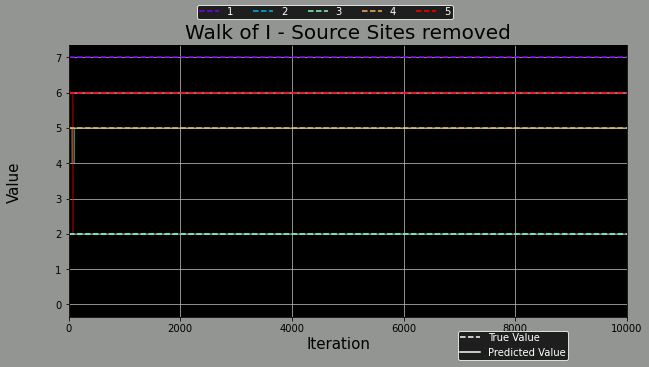

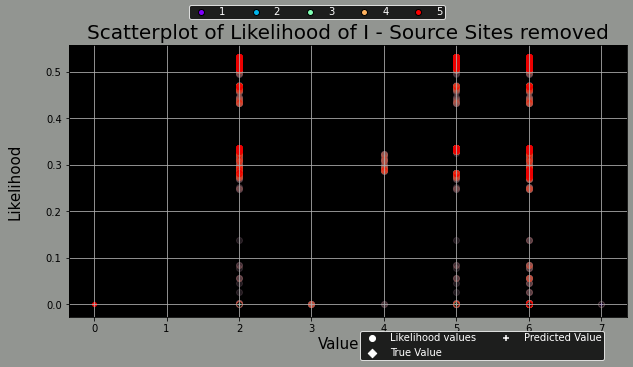

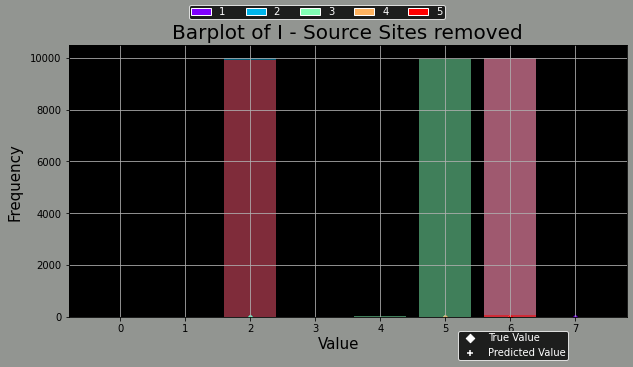

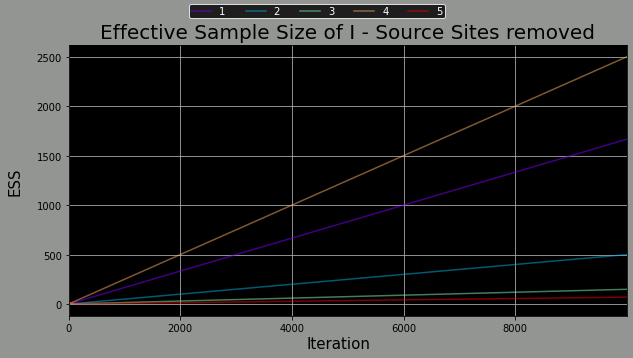

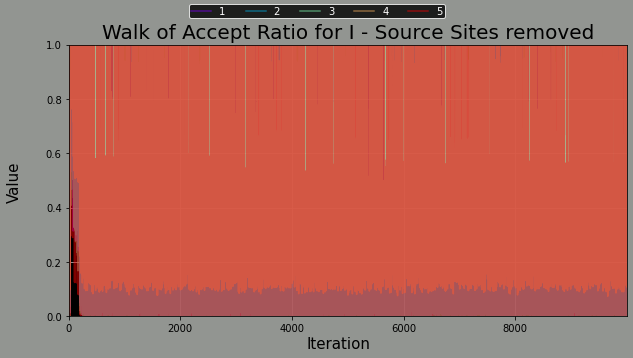

T


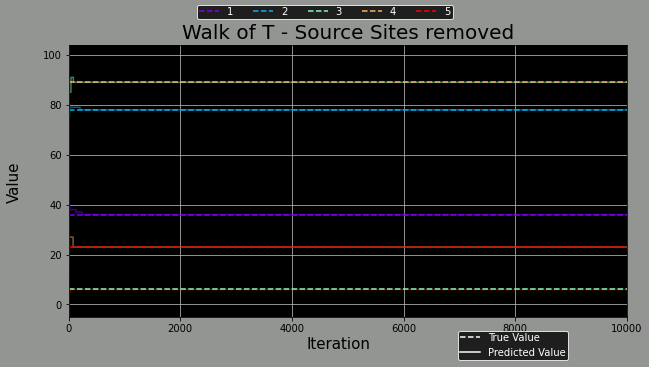

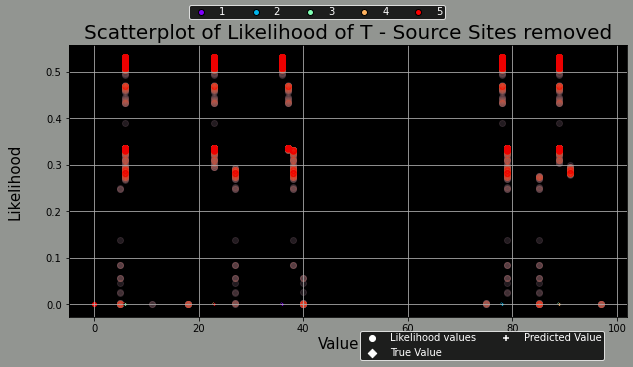

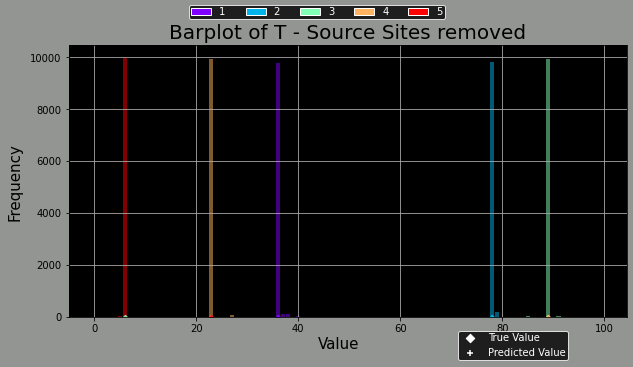

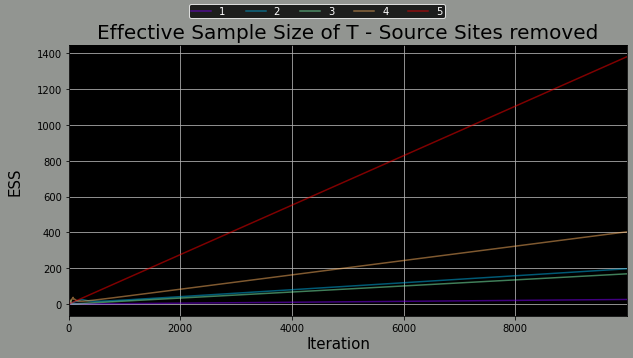

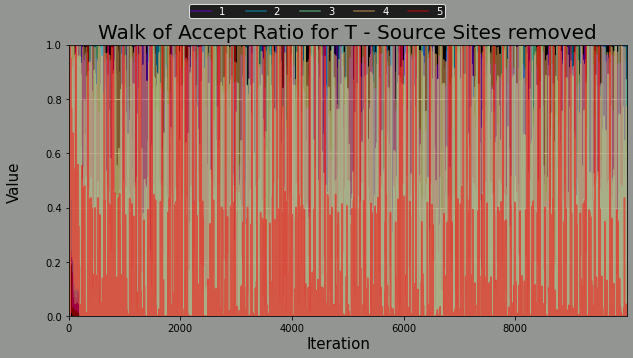

W


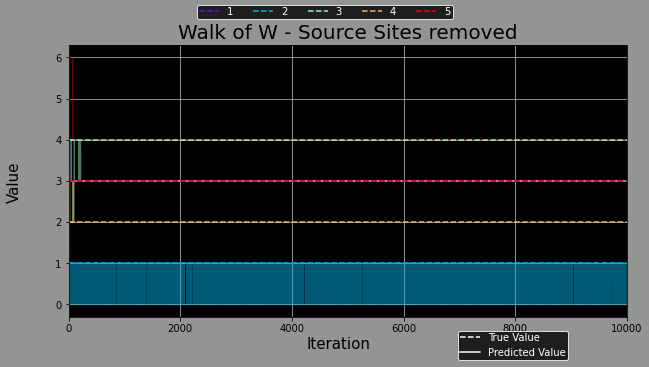

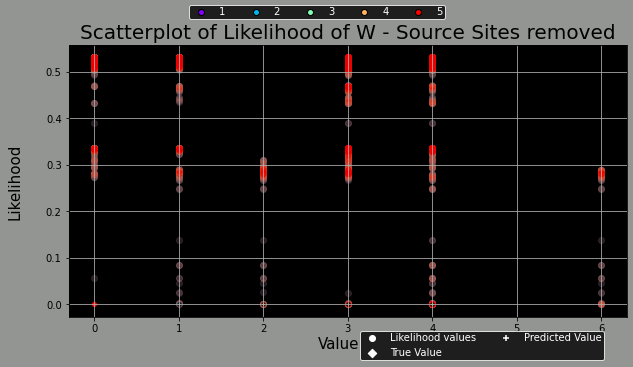

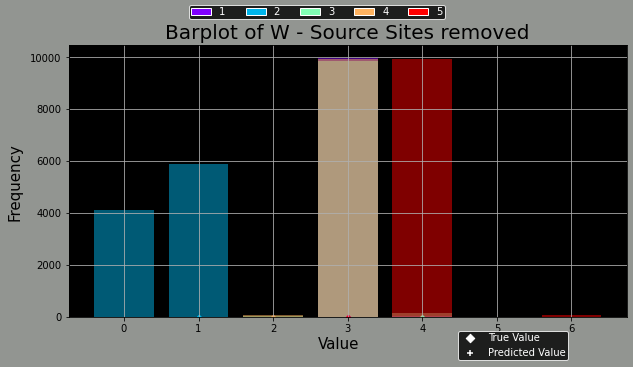

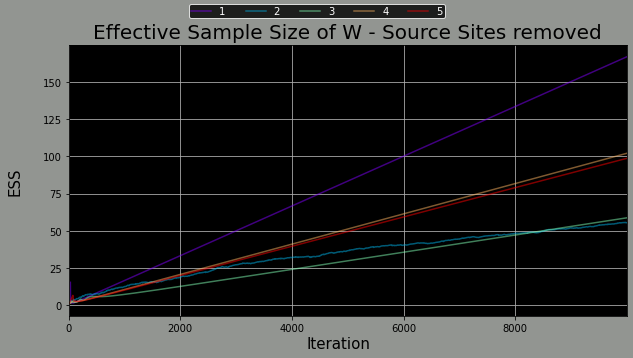

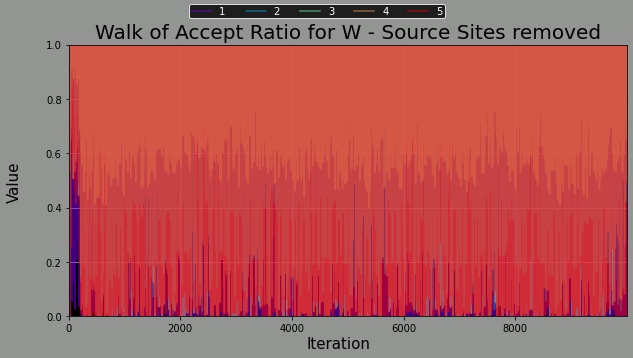

S


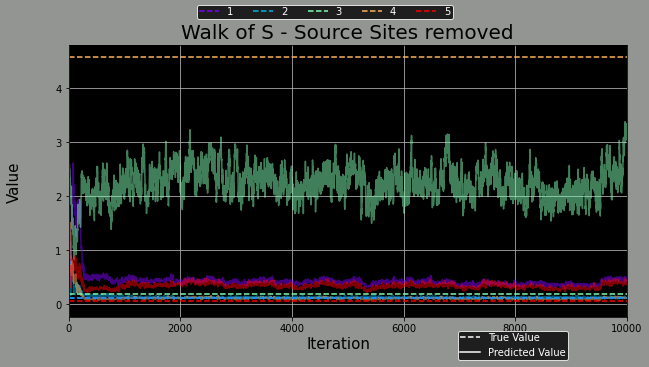

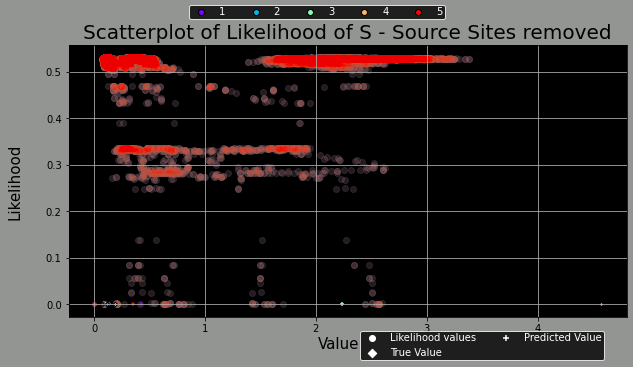

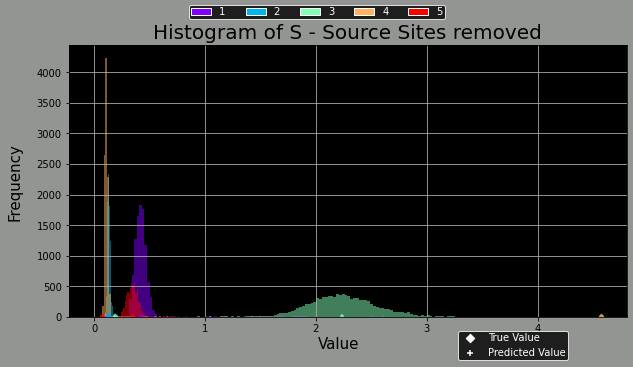

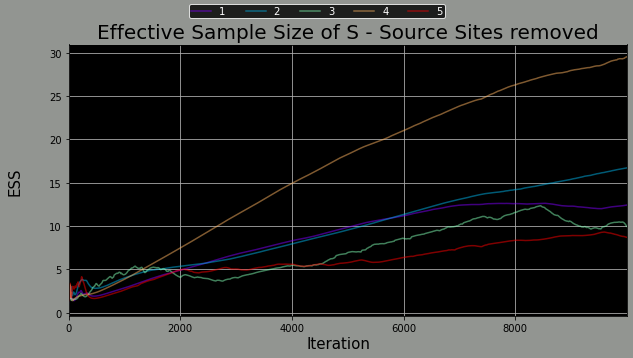

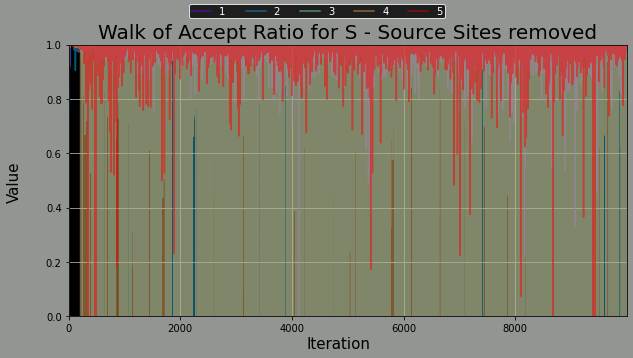

In [32]:
#@title MH sampler - Not even close

sites = 10
length = 100
delta = 0.0000000001

# Loading in true data
filepath_csv = "./drive/My Drive/VUW Work/2022/T3 2022/Summer Research Scholarship/Datasets/" 

sample = np.array(pd.read_csv(filepath_csv + "MTrue_Full.csv").set_index('Unnamed: 0'))
CArray = np.array(pd.read_csv(filepath_csv + "CTrue_Full.csv").set_index('Unnamed: 0'))
Y = np.array(pd.read_csv(filepath_csv + "YTrue_Full.csv").set_index('Unnamed: 0'))
sampleObserved = np.array(pd.read_csv(filepath_csv + "MTrue_Observed.csv").set_index('Unnamed: 0'))
CArrayObserved = np.array(pd.read_csv(filepath_csv + "CTrue_Observed.csv").set_index('Unnamed: 0'))
YObserved = np.array(pd.read_csv(filepath_csv + "YTrue_Observed.csv").set_index('Unnamed: 0'))

# Loading in true parameters
params = pd.read_csv(filepath_csv + "Parameters.csv").drop('Unnamed: 0', axis = 1)
trueAlpha = params["Alpha"][0]
trueBeta = params["Beta"][0]
trueN = int(params["N"][0])
trueI = [int(i) for i in params["I"][:trueN]]
trueT = [int(i) for i in params["T"][:trueN]]
trueW = [int(i) for i in params["W"][:trueN]]
trueS = params["S"][:trueN]
trueTau = params["Tau"][0]
V = [int(i) for i in params["V"]]

S = 10000

DICMasterFullArray = np.zeros((S - 1, 2))
DICMasterObservedArray = np.zeros((S - 1, 2))
likelihoodMasterFullArray = np.zeros((S - 1, 2))
likelihoodMasterObservedArray = np.zeros((S - 1, 2))

IOptions = [[], trueI]
dicLabels = ["All sites", "Source Sites removed"]

for d in range(2):

    OArray = generateObservationArraySites(sites, length, IOptions[d])

    # Prior parameters

      # Alpha
    alphaA0 = 2
    alphaB0 = 1
    alphaPrior = stats.gamma(alphaA0, scale = 1/alphaB0)
    alpha0 = alphaPrior.rvs()

      # Beta
    betaA0 = 1
    betaB0 = 1
    betaPrior = stats.beta(betaA0, betaB0)
    beta0 = betaPrior.rvs()

      # N
    NA0 = 0.1
    NPrior = stats.geom(NA0)
    N0 = trueN
    # N0 = int(NPrior.rvs())

      # I
    IA0 = 0
    IB0 = sites
    IPrior = stats.randint(IA0, IB0)
    I0 = IPrior.rvs(N0)

      # T
    TA0 = 0
    TB0 = length
    TPrior = stats.randint(TA0, TB0)
    T0 = TPrior.rvs(N0)

      # W
    WA0 = 6
    WB0 = 0.75
    WPrior = stats.nbinom(WA0, WB0)
    W0 = WPrior.rvs(N0)

      # S
    SA0 = 1
    SB0 = 1
    SPrior = stats.gamma(SA0, scale = 1/SB0)
    # S0 = [SPrior.rvs()]
    S0 = SPrior.rvs(N0)

      # Tau
    tauA0 = 1
    tauB0 = 1
    tauPrior = stats.gamma(tauA0, scale = 1/tauB0)
    tau0 = tauPrior.rvs()

    phi = [alpha0, beta0, N0, I0, T0, W0, S0, tau0]
    PHI = dict.fromkeys(range(S))
    PHI[0] = phi

    alphaArray = np.zeros((S,))
    betaArray = np.zeros((S,))
    IArray = np.zeros((S, N0))
    TArray = np.zeros((S, N0))
    WArray = np.zeros((S, N0))
    SArray = np.zeros((S, N0))
    tauArray = np.zeros((S,))

    alphaLikelihoodArray = np.zeros((S - 1,))
    betaLikelihoodArray = np.zeros((S - 1,))
    ILikelihoodArray = np.zeros((S - 1, N0))
    TLikelihoodArray = np.zeros((S - 1, N0))
    WLikelihoodArray = np.zeros((S - 1, N0))
    SLikelihoodArray = np.zeros((S - 1, N0))
    tauLikelihoodArray = np.zeros((S - 1,))

    alphaESSArray = np.zeros((S - 1,))
    betaESSArray = np.zeros((S - 1,))
    IESSArray = np.zeros((S - 1, N0))
    TESSArray = np.zeros((S - 1, N0))
    WESSArray = np.zeros((S - 1, N0))
    SESSArray = np.zeros((S - 1, N0))
    tauESSArray = np.zeros((S - 1,))

    likelihoodFullArray = np.zeros((S - 1,))
    likelihoodObservedArray = np.zeros((S - 1,))

    devianceFullArray = np.zeros((S - 1,))
    DICFullArray = np.zeros((S - 1,))

    devianceObservedArray = np.zeros((S - 1,))
    DICObservedArray = np.zeros((S - 1,))

    alphaRatioArray = np.zeros((S - 1,))
    betaRatioArray = np.zeros((S - 1,))
    IRatioArray = np.zeros((S - 1, N0))
    TRatioArray = np.zeros((S - 1, N0))
    WRatioArray = np.zeros((S - 1, N0))
    SRatioArray = np.zeros((S - 1, N0))
    tauRatioArray = np.zeros((S - 1,))

    alphaArray[0] = alpha0
    betaArray[0] = beta0
    IArray[0, :] = I0
    TArray[0, :] = T0
    WArray[0, :] = W0
    SArray[0, :] = S0
    tauArray[0] = tau0

    alphaAccept = 0
    betaAccept = 0
    IAccept = 0
    TAccept = 0
    WAccept = 0
    SAccept = 0
    tauAccept = 0

    start = time.time()

    massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
    concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
    concSampleCurrentObserved = concSampleCurrent*OArray

    for s in range(1, S):
      # Alpha
        # Grabbing candidate alpha
        qDistAlpha = stats.norm(phi[0], 2)
        alphaCandidate = qDistAlpha.rvs()
        qDistAlphaCandidate = stats.norm(alphaCandidate, 2)

        # Calculating mass and concentrations
        massSampleCandidate = getSample(sites, length, pmat, alphaCandidate, phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
        concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
        concSampleCandidateObserved = concSampleCandidate*OArray

        # Calculating probability
            # Prior
        priorCandidateP = alphaPrior.logpdf(alphaCandidate)
        priorCurrentP = alphaPrior.logpdf(phi[0])

            # Likelihood
        pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
        likelihoodCandidateP = np.nansum(pArrayCandidate)

        pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
        likelihoodCurrentP = np.nansum(pArrayCurrent)

            # Proposal
        qCandidate = qDistAlpha.logpdf(alphaCandidate)
        qCurrent = qDistAlphaCandidate.logpdf(phi[0])

        ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
        alphaRatioArray[s - 1] = ratio

        # Accept/Reject Alpha
        u = np.log(stats.uniform().rvs())
        if ratio >= u:
            #print("Accepted Alpha: ", s)
            phi[0] = alphaCandidate
            alphaAccept += 1
            alphaLikelihoodArray[s - 1] = likelihoodCandidateP

            massSampleCurrent = massSampleCandidate
            concSampleCurrent = concSampleCandidate
            concSampleCurrentObserved = concSampleCandidateObserved
        else:
            alphaLikelihoodArray[s - 1] = likelihoodCurrentP
        
        alphaArray[s] = phi[0]
        alphaESSArray[s - 1] = ESS(alphaArray[:s])

      # Beta
        # Grabbing candidate beta
        qDistBeta = stats.beta(1, 1)
        betaCandidate = qDistBeta.rvs()
        qDistBetaCandidate = stats.beta(1, 1)

        # Calculating mass and concentrations
        massSampleCandidate = getSample(sites, length, pmat, phi[0], betaCandidate, phi[2], phi[3], phi[4], phi[5], phi[6])
        concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
        concSampleCandidateObserved = concSampleCandidate*OArray

        #massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
        #concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
        #concSampleCurrentObserved = concSampleCurrent*OArray

        # Calculating probability
            # Prior
        priorCandidateP = betaPrior.logpdf(betaCandidate)
        priorCurrentP = betaPrior.logpdf(phi[1])

            # Likelihood
        pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
        pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

        likelihoodCandidateP = np.nansum(pArrayCandidate)
        likelihoodCurrentP = np.nansum(pArrayCurrent)

            # Proposal
        qCandidate = qDistBeta.logpdf(betaCandidate)
        qCurrent = qDistBetaCandidate.logpdf(phi[1])

        #print(pCandidate, pPrior)
        ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
        betaRatioArray[s - 1] = ratio

        # Accept/Reject Beta
        u = np.log(stats.uniform().rvs())
        if ratio >= u:
            #print("Accepted Beta: ", s)
            phi[1] = betaCandidate
            betaAccept += 1
            betaLikelihoodArray[s - 1] = likelihoodCandidateP

            massSampleCurrent = massSampleCandidate
            concSampleCurrent = concSampleCandidate
            concSampleCurrentObserved = concSampleCandidateObserved
        else:
            betaLikelihoodArray[s - 1] = likelihoodCurrentP

        betaArray[s] = phi[1]
        betaESSArray[s - 1] = ESS(betaArray[:s])

        # I
        for site in range(phi[2]):
            # Grabbing candidate Ii
            qDistI = stats.randint(0, sites)
            iCandidate = qDistI.rvs()
            ICandidate = phi[3].copy()
            ICandidate[site] = iCandidate

            # Calculating mass and concentrations
            massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], ICandidate, phi[4], phi[5], phi[6])
            concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
            concSampleCandidateObserved = concSampleCandidate*OArray

            #massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
            #concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
            #concSampleCurrentObserved = concSampleCurrent*OArray

            # Calculating probability
                # Prior
            priorCandidateP = IPrior.logpmf(iCandidate)
            priorCurrentP = IPrior.logpmf(phi[3][site])

                # Likelihood
            pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
            pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

            likelihoodCandidateP = np.nansum(pArrayCandidate)
            likelihoodCurrentP = np.nansum(pArrayCurrent)


                # Proposal
            qCandidate = qDistI.logpmf(iCandidate)
            qCurrent = qDistI.logpmf(phi[3][site])

            #print(pCandidate, pPrior)
            ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
            IRatioArray[s - 1, site] = ratio

            # Accept/Reject I
            u = np.log(stats.uniform().rvs())
            if ratio >= u:
                #print(f"Accepted I{site}: ", s)
                phi[3] = ICandidate
                IAccept += 1/phi[2]
                ILikelihoodArray[s - 1, site] = likelihoodCandidateP

                massSampleCurrent = massSampleCandidate 
                concSampleCurrent = concSampleCandidate
                concSampleCurrentObserved = concSampleCandidateObserved
            else:
                ILikelihoodArray[s - 1, site] = likelihoodCurrentP

            IArray[s, site] = phi[3][site]
            IESSArray[s - 1, site] = ESS(IArray[:s, site])

        # T
        for t in range(phi[2]):
            # Grabbing candidate Ti
            qDistT = stats.randint(0, length)
            tCandidate = qDistT.rvs()
            TCandidate = phi[4].copy()
            TCandidate[t] = tCandidate
            qDisttCandidate = stats.randint(0, length)

            # Calculating mass and concentrations
            massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], TCandidate, phi[5], phi[6])
            concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
            concSampleCandidateObserved = concSampleCandidate*OArray

            #massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
            #concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
            #concSampleCurrentObserved = concSampleCurrent*OArray

            # Calculating probability
                # Prior
            priorCandidateP = TPrior.logpmf(tCandidate)
            priorCurrentP = TPrior.logpmf(phi[4][t])

                # Likelihood
            pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
            pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

            likelihoodCandidateP = np.nansum(pArrayCandidate)
            likelihoodCurrentP = np.nansum(pArrayCurrent)

                # Proposal
            qCandidate = qDistT.logpmf(tCandidate)
            qCurrent = qDisttCandidate.logpmf(phi[4][t])

            #print(pCandidate, pPrior)
            ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
            TRatioArray[s - 1, t] = ratio

            # Accept/Reject T
            u = np.log(stats.uniform().rvs())

            if ratio >= u:
                #print(f"Accepted T{t}: ", s)
                phi[4] = TCandidate
                TAccept += 1/phi[2]
                TLikelihoodArray[s - 1, t] = likelihoodCandidateP

                massSampleCurrent = massSampleCandidate
                concSampleCurrent = concSampleCandidate
                concSampleCurrentObserved = concSampleCandidateObserved
            else:
                TLikelihoodArray[s - 1, t] = likelihoodCurrentP
                
            TArray[s, t] = phi[4][t]
            TESSArray[s - 1, t] = ESS(TArray[:s, t])

          # W
            # Grabbing candidate W
        for w in range(phi[2]):
            qDistW = stats.binom(length, (phi[5][w] + 1)/(length + 2))
            wCandidate = qDistW.rvs()
            WCandidate = phi[5].copy()
            WCandidate[w] = wCandidate
            qDistwCandidate = stats.binom(length, (wCandidate + 1)/(length + 2))

            # Calculating mass and concentrations
            massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], WCandidate, phi[6])
            concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
            concSampleCandidateObserved = concSampleCandidate*OArray

            #massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
            #concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
            #concSampleCurrentObserved = concSampleCurrent*OArray

            # Calculating probability
                # Prior
            priorCandidateP = WPrior.logpmf(wCandidate)
            priorCurrentP = WPrior.logpmf(phi[5][w])

                # Likelihood
            pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
            pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

            likelihoodCandidateP = np.nansum(pArrayCandidate)
            likelihoodCurrentP = np.nansum(pArrayCurrent)

                # Proposal
            qCandidate = qDistW.logpmf(wCandidate)
            qCurrent = qDistwCandidate.logpmf(phi[5][w])

            #print(pCandidate, pPrior)
            ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
            WRatioArray[s - 1, w] = ratio

            # Accept/Reject W
            u = np.log(stats.uniform().rvs())
            if ratio >= u:
                #print(f"Accepted W{w}: ", s)
                phi[5] = WCandidate
                WAccept += 1/phi[2]
                WLikelihoodArray[s - 1, w] = likelihoodCandidateP

                massSampleCurrent = massSampleCandidate
                concSampleCurrent = concSampleCandidate
                concSampleCurrentObserved = concSampleCandidateObserved
            else:
                WLikelihoodArray[s - 1, w] = likelihoodCurrentP

            WArray[s, w] = phi[5][w]
            WESSArray[s - 1, w] = ESS(WArray[:s, w])

          # S
            # Grabbing candidate S
        for size in range(phi[2]):
            qDists = stats.norm(phi[6][size], .1)
            sCandidate = qDists.rvs()
            SCandidate = phi[6].copy()
            SCandidate[size] = sCandidate
            qDistsCandidate = stats.norm(sCandidate, .1)

            # Calculating mass and concentrations
            massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], SCandidate)
            concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
            concSampleCandidateObserved = concSampleCandidate*OArray

            #massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
            #concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
            #concSampleCurrentObserved = concSampleCurrent*OArray

            # Calculating probability
                # Prior
            priorCandidateP = SPrior.logpdf(sCandidate)
            priorCurrentP = SPrior.logpdf(phi[6][size])

                # Likelihood
            pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
            pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

            likelihoodCandidateP = np.nansum(pArrayCandidate)
            likelihoodCurrentP = np.nansum(pArrayCurrent)

                # Proposal
            qCandidate = qDists.logpdf(sCandidate)
            qCurrent = qDistsCandidate.logpdf(phi[6][size])

            #print(pCandidate, pPrior)
            ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
            SRatioArray[s - 1, size] = ratio

            # Accept/Reject S
            u = np.log(stats.uniform().rvs())
            if ratio >= u:
                #print(f"Accepted S{size}: ", s)
                phi[6] = SCandidate
                SAccept += 1/phi[2]
                SLikelihoodArray[s - 1, size] = likelihoodCandidateP

                massSampleCurrent = massSampleCandidate
                concSampleCurrent = concSampleCandidate
                concSampleCurrentObserved = concSampleCandidateObserved
            else:
                SLikelihoodArray[s - 1, size] = likelihoodCurrentP

            SArray[s, size] = phi[6][size]
            SESSArray[s - 1, size] = ESS(SArray[:s, size])

      # Tau
        # Grabbing candidate Tau
        qDistTau = stats.norm(phi[7], .5)
        tauCandidate = qDistTau.rvs()
        qDistTauCandidate = stats.norm(tauCandidate, .5)

        # Calculating mass and concentrations
        #massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
        #concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
        #concSampleCandidateObserved = concSampleCandidate*OArray

        #massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
        #concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
        #concSampleCurrentObserved = concSampleCurrent*OArray

        # Calculating probability
            # Prior
        priorCandidateP = tauPrior.logpdf(tauCandidate)
        priorCurrentP = tauPrior.logpdf(phi[7])

            # Likelihood
        pArrayCandidate = stats.norm(concSampleCurrentObserved, 1/np.sqrt(tauCandidate)).logpdf(YObserved)
        pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

        likelihoodCandidateP = np.nansum(pArrayCandidate)
        likelihoodCurrentP = np.nansum(pArrayCurrent)

            # Proposal
        qCandidate = qDistTau.logpdf(tauCandidate)
        qCurrent = qDistTauCandidate.logpdf(phi[7])

        #print(pCandidate, pPrior)
        ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
        tauRatioArray[s - 1] = ratio

        # Accept/Reject tau
        u = np.log(stats.uniform().rvs())
        if ratio >= u:
            #print("Accepted Tau: ", s)
            phi[7] = tauCandidate
            tauAccept += 1
            tauLikelihoodArray[s - 1] = likelihoodCandidateP
        else:
            tauLikelihoodArray[s - 1] = likelihoodCurrentP

        tauArray[s] = phi[7]
        tauESSArray[s - 1] = ESS(tauArray[:s])

        # Likelihood
          # Calculating f(Y|phi) 
        massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
        concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
        concSampleCurrentObserved = concSampleCurrent*OArray

        # Likelihood over observed
        pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
        likelihoodObservedCurrent = np.nansum(pArrayCurrent)
        likelihoodObservedArray[s - 1] = likelihoodObservedCurrent

        # Likelihood over full
        pArrayCurrent = stats.norm(concSampleCurrent, 1/np.sqrt(phi[7])).logpdf(Y)
        likelihoodFullCurrent = np.nansum(pArrayCurrent)
        likelihoodFullArray[s - 1] = likelihoodFullCurrent

        # DIC
          # Calculating f(Y|Theta Hat)
        massSampleHat = getSample(sites, length, pmat, np.median(alphaArray), np.median(betaArray), phi[2], 
                          [int(np.median(IArray[:, i])) for i in range(phi[2])], [int(np.median(TArray[:, i])) for i in range(phi[2])], 
                          [int(np.median(WArray[:, i])) for i in range(phi[2])], [np.median(SArray[:, i]) for i in range(phi[2])])
        
        concSampleHat = convertConcentration(sites, length, massSampleCandidate, V, delta)
        concSampleHatObserved = concSampleHat*OArray

          # Full
        pArrayHat = stats.norm(concSampleHat, 1/np.sqrt(np.median(tauArray[:s]))).logpdf(Y)
        likelihoodFullHat = np.nansum(pArrayHat)

          # Calculating D, DBar and DHat
        devFull = -2*likelihoodFullCurrent
        devianceFullArray[s - 1] = devFull
        devFullBar = np.mean(devianceFullArray[:s])
        devFullHat = -2*likelihoodFullHat

          # Calculating DIC
        DICFull = 2*devFullBar - devFullHat 
        DICFullArray[s - 1] = DICFull

          # Observed
        pArrayHat = stats.norm(concSampleHatObserved, 1/np.sqrt(np.median(tauArray[:s]))).logpdf(YObserved)
        likelihoodObservedHat = np.nansum(pArrayHat)

          # Calculating D, DBar and DHat
        devObserved = -2*likelihoodObservedCurrent
        devianceObservedArray[s - 1] = devObserved
        devObservedBar = np.mean(devianceObservedArray[:s])
        devObservedHat = -2*likelihoodObservedHat

          # Calculating DIC
        DICObserved = 2*devObservedBar - devObservedHat 
        DICObservedArray[s - 1] = DICObserved
        

        newPhi = [phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], phi[7]]
        PHI[s] = newPhi

        #if np.mod(s, 1000) == 0:
            #print(f"Completed {s}")
    print("")

    # Printing computing time
    end = time.time()
    timeDiff = int(end - start)
    hours = int(np.floor(timeDiff/60**2))
    timeDiff = timeDiff - hours*(60**2)
    minutes = int(np.floor(timeDiff/60))
    timeDiff = int(timeDiff - minutes*60)
    print(f"Computing time was {hours} hours {minutes} minutes and {timeDiff} seconds")

    DICMasterFullArray[:, d - 1] = DICFullArray
    DICMasterObservedArray[:, d - 1] = DICObservedArray
    likelihoodMasterFullArray[:, d - 1] = likelihoodFullArray
    likelihoodMasterObservedArray[:, d - 1] = likelihoodObservedArray

    results(phi[2], f"{dicLabels[d]}")

# Results

<Axes: title={'center': 'Walk of DIC of Full data'}>

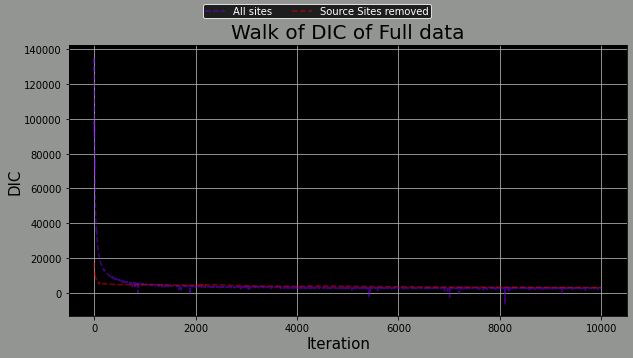

In [33]:
plotDICSet(DICMasterFullArray, sites, length, 2, dicLabels, "Full data")

<Axes: title={'center': 'Walk of DIC of Observed data'}>

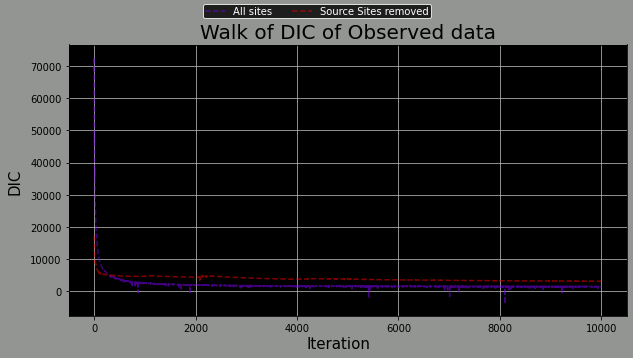

In [34]:
plotDICSet(DICMasterObservedArray, sites, length, 2, dicLabels, "Observed data")

<ipython-input-35-30073cb18560>:1: RuntimeWarning: invalid value encountered in log
  plotDICSet(np.log(DICMasterFullArray), sites, length, 2, dicLabels, "Full data - Log")


<Axes: title={'center': 'Walk of DIC of Full data - Log'}>

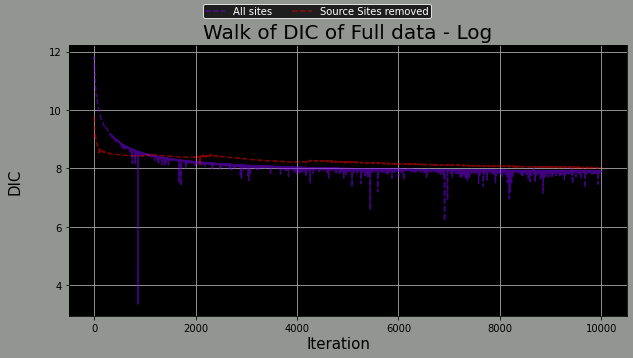

In [35]:
plotDICSet(np.log(DICMasterFullArray), sites, length, 2, dicLabels, "Full data - Log")

<ipython-input-36-8cd7d5e41336>:1: RuntimeWarning: invalid value encountered in log
  plotDICSet(np.log(DICMasterObservedArray), sites, length, 2, dicLabels, "Observed data - Log")


<Axes: title={'center': 'Walk of DIC of Observed data - Log'}>

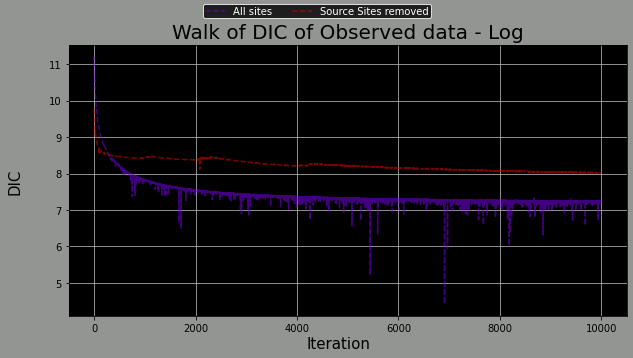

In [36]:
plotDICSet(np.log(DICMasterObservedArray), sites, length, 2, dicLabels, "Observed data - Log")

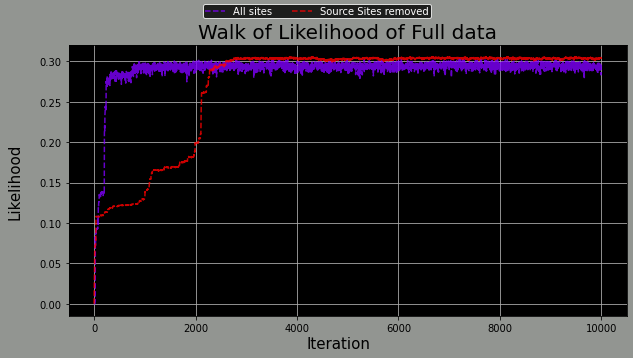

In [37]:
plotLikelihoodSet(likelihoodMasterFullArray, sites, length, 2, "Full data", dicLabels)

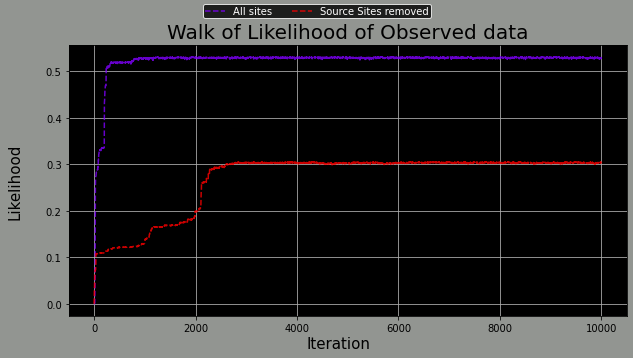

In [38]:
plotLikelihoodSet(likelihoodMasterObservedArray, sites, length, 2, "Observed data", dicLabels)